# Home Credit Default Risk (HCDR)

The course project is based on the [Home Credit Default Risk (HCDR)  Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk/). The goal of this project is to predict whether or not a client will repay a loan. In order to make sure that people who struggle to get loans due to insufficient or non-existent credit histories have a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.


## Some of the challenges

1. Dataset size 
   * (688 meg compressed) with millions of rows of data
   * 2.71 Gig of data uncompressed
* Dealing with missing data
* Imbalanced datasets
* Summarizing transaction data
 

# Dataset and how to download


## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

## Data files overview

The `HomeCredit_columns_description.csv` acts as a data dictioanry.

There are 7 different sources of data:

* __application_train/application_test (307k rows, and 48k rows):__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau (1.7 Million rows):__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance (27 Million rows):__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application (1.6 Million rows):__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE (10 Million rows):__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment (13.6 Million rows):__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.


### Table sizes
```python
name                       [  rows cols]     MegaBytes         
-----------------------  ------------------  -------
application_train       : [  307,511, 122]:   158MB
application_test        : [   48,744, 121]:   25MB
bureau                  : [ 1,716,428, 17]    162MB
bureau_balance          : [ 27,299,925, 3]:   358MB
credit_card_balance     : [  3,840,312, 23]   405MB
installments_payments   : [ 13,605,401, 8]    690MB
previous_application    : [  1,670,214, 37]   386MB
POS_CASH_balance        : [ 10,001,358, 8]    375MB
```




### Imports

In [1]:
from scipy import stats
# import latexify
import time
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
import pickle
import json
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import log_loss, classification_report, roc_auc_score, make_scorer
from scipy import stats
from sklearn.svm import SVC
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

## Data files overview
### Data Dictionary

As part of the data download comes a  Data Dictionary. It named `HomeCredit_columns_description.csv`

### Application train

In [2]:
def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily
ds_name = 'application_train'
DATA_DIR=f"../Data/home-credit-default-risk/"
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

datasets['application_train'].shape

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


(307511, 122)

### Application test


* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.


In [3]:
ds_name = 'application_test'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


The application dataset has the most information about the client: Gender, income, family status, education ...

### The Other datasets

* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [4]:
%%time
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)


application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


CPU times: user 26.8 s, sys: 6.52 s, total: 33.3 s
Wall time: 35.7 s


In [5]:
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')


dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


## Undersampling

Undersampling is performed when the data is highly biased.  In this case, we can see that the number of defaulters in the target variable is very low in comparison to the number of persons who successfully repaid the loan. As a result, we perform undersampling, taking random entries from the good population while keeping all entries from the defaulters.

In [6]:
# Access the 'application_train' dataset from the 'datasets' container
application_train = datasets['application_train']

# Select the minority class instances (TARGET = 1) from the training dataset
minority_application_train = application_train[application_train['TARGET']==1]

# Append a randomly sampled subset of majority class instances (TARGET = 0) to the minority class instances
undersampled_application_train = minority_application_train.append(
    application_train[application_train['TARGET']==0].reset_index(drop=True).sample(n = 75000)
)


In [7]:
# Assign the undersampled training dataset to a new key in the 'datasets' dictionary
datasets["undersampled_application_train"] = undersampled_application_train 

# Count the number of instances in each class
class_distribution = undersampled_application_train['TARGET'].value_counts()

# Print the class distribution
print("Class distribution in the undersampled training dataset:")
print(class_distribution)


Class distribution in the undersampled training dataset:
0    75000
1    24825
Name: TARGET, dtype: int64


Undersampling by keeping similar ratio of non-defaulters to defaulters and also maintaining loan types of non-defaulters uniformly

In [8]:
  # Assuming this is a dictionary where you store your datasets

# Filtering rows with TARGET == 1 and creating a new DataFrame
datasets["undersampled_application_train_2"] = datasets["application_train"][datasets["application_train"].TARGET == 1].copy()
datasets["undersampled_application_train_2"]['weight'] = 1

# Undersampling Cash loans
num_default_cashloans = len(datasets["undersampled_application_train_2"][(datasets["undersampled_application_train_2"].NAME_CONTRACT_TYPE == 'Cash loans') & (datasets["undersampled_application_train_2"].TARGET == 1)])
df_sample_cash = datasets["application_train"][(datasets["application_train"].NAME_CONTRACT_TYPE == 'Cash loans') & (datasets["application_train"].TARGET == 0)].sample(n=num_default_cashloans, random_state=42)
df_sample_cash['weight'] = 1

# Undersampling Revolving loans
num_default_revolvingloans = len(datasets["undersampled_application_train_2"][(datasets["undersampled_application_train_2"].NAME_CONTRACT_TYPE == 'Revolving loans') & (datasets["undersampled_application_train_2"].TARGET == 1)])
df_sample_revolving = datasets["application_train"][(datasets["application_train"].NAME_CONTRACT_TYPE == 'Revolving loans') & (datasets["application_train"].TARGET == 0)].sample(n=num_default_revolvingloans, random_state=42)
df_sample_revolving['weight'] = 1

# Combining undersampled cash loans and revolving loans with the initial DataFrame
datasets["undersampled_application_train_2"] = pd.concat([datasets["undersampled_application_train_2"], df_sample_cash, df_sample_revolving])

# Check the distribution of the TARGET variable
print(datasets["undersampled_application_train_2"].TARGET.value_counts())


1    24825
0    24825
Name: TARGET, dtype: int64


In [9]:
# Assuming this is a dictionary where you store your datasets

# Filtering rows with TARGET == 1 and creating a new DataFrame
undersampled_application_train_2 = datasets["application_train"][datasets["application_train"].TARGET == 1].copy()
undersampled_application_train_2['weight'] = 1

# Undersampling Cash loans
num_default_cashloans = len(undersampled_application_train_2[(undersampled_application_train_2.NAME_CONTRACT_TYPE == 'Cash loans') & (undersampled_application_train_2.TARGET == 1)])
df_sample_cash = datasets["application_train"][(datasets["application_train"].NAME_CONTRACT_TYPE == 'Cash loans') & (datasets["application_train"].TARGET == 0)].sample(n=num_default_cashloans, random_state=42)
df_sample_cash['weight'] = 1

# Undersampling Revolving loans
num_default_revolvingloans = len(undersampled_application_train_2[(undersampled_application_train_2.NAME_CONTRACT_TYPE == 'Revolving loans') & (undersampled_application_train_2.TARGET == 1)])
df_sample_revolving = datasets["application_train"][(datasets["application_train"].NAME_CONTRACT_TYPE == 'Revolving loans') & (datasets["application_train"].TARGET == 0)].sample(n=num_default_revolvingloans, random_state=42)
df_sample_revolving['weight'] = 1

# Combining undersampled cash loans and revolving loans with the initial DataFrame
undersampled_application_train_2 = pd.concat([undersampled_application_train_2, df_sample_cash, df_sample_revolving])

# Check the distribution of the TARGET variable
print(undersampled_application_train_2.TARGET.value_counts())


1    24825
0    24825
Name: TARGET, dtype: int64


## Correlation Analysis

### Correlation with  the target column 

In [10]:
correlations = datasets["application_train"].corr()['TARGET'].sort_values() 
print('Most Positive Correlations:\n', correlations.tail(10)) 
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


In [11]:
corr_application_train = application_train.corr()['TARGET'].sort_values()
corr_application_train = corr_application_train.reset_index().rename(columns={'index':'Attributes','TARGET':'Correlation'}) 
corr_application_train

,Attributes,Correlation
0,EXT_SOURCE_3,-0.178919
1,EXT_SOURCE_2,-0.160472
2,EXT_SOURCE_1,-0.155317
3,DAYS_EMPLOYED,-0.044932
4,FLOORSMAX_AVG,-0.044003
...,...,...
101,DAYS_LAST_PHONE_CHANGE,0.055218
102,REGION_RATING_CLIENT,0.058899
103,REGION_RATING_CLIENT_W_CITY,0.060893
104,DAYS_BIRTH,0.078239


In [12]:
corr = datasets["undersampled_application_train"].corr()['TARGET'] 
corr=corr.sort_values(ascending=False)
print('NEGATIVE CORRELATIONS:\n', corr.tail(10))
print('\n\nPOSITIVE CORRELATIONS\n', corr.head(10))

NEGATIVE CORRELATIONS:
 REGION_POPULATION_RELATIVE   -0.062336
AMT_GOODS_PRICE              -0.064391
FLOORSMAX_MODE               -0.071863
FLOORSMAX_MEDI               -0.072611
DAYS_EMPLOYED                -0.073207
FLOORSMAX_AVG                -0.073424
EXT_SOURCE_2                 -0.244281
EXT_SOURCE_1                 -0.247941
EXT_SOURCE_3                 -0.274171
FLAG_DOCUMENT_12                   NaN
Name: TARGET, dtype: float64


POSITIVE CORRELATIONS
 TARGET                         1.000000
DAYS_BIRTH                     0.125553
REGION_RATING_CLIENT_W_CITY    0.096232
REGION_RATING_CLIENT           0.093327
DAYS_LAST_PHONE_CHANGE         0.087116
DAYS_ID_PUBLISH                0.080166
REG_CITY_NOT_WORK_CITY         0.076080
FLAG_EMP_PHONE                 0.074873
FLAG_DOCUMENT_3                0.071017
DAYS_REGISTRATION              0.068055
Name: TARGET, dtype: float64


Text(0.5, 1.0, 'Correlation Heatmap for features with highest correlations with target variables')

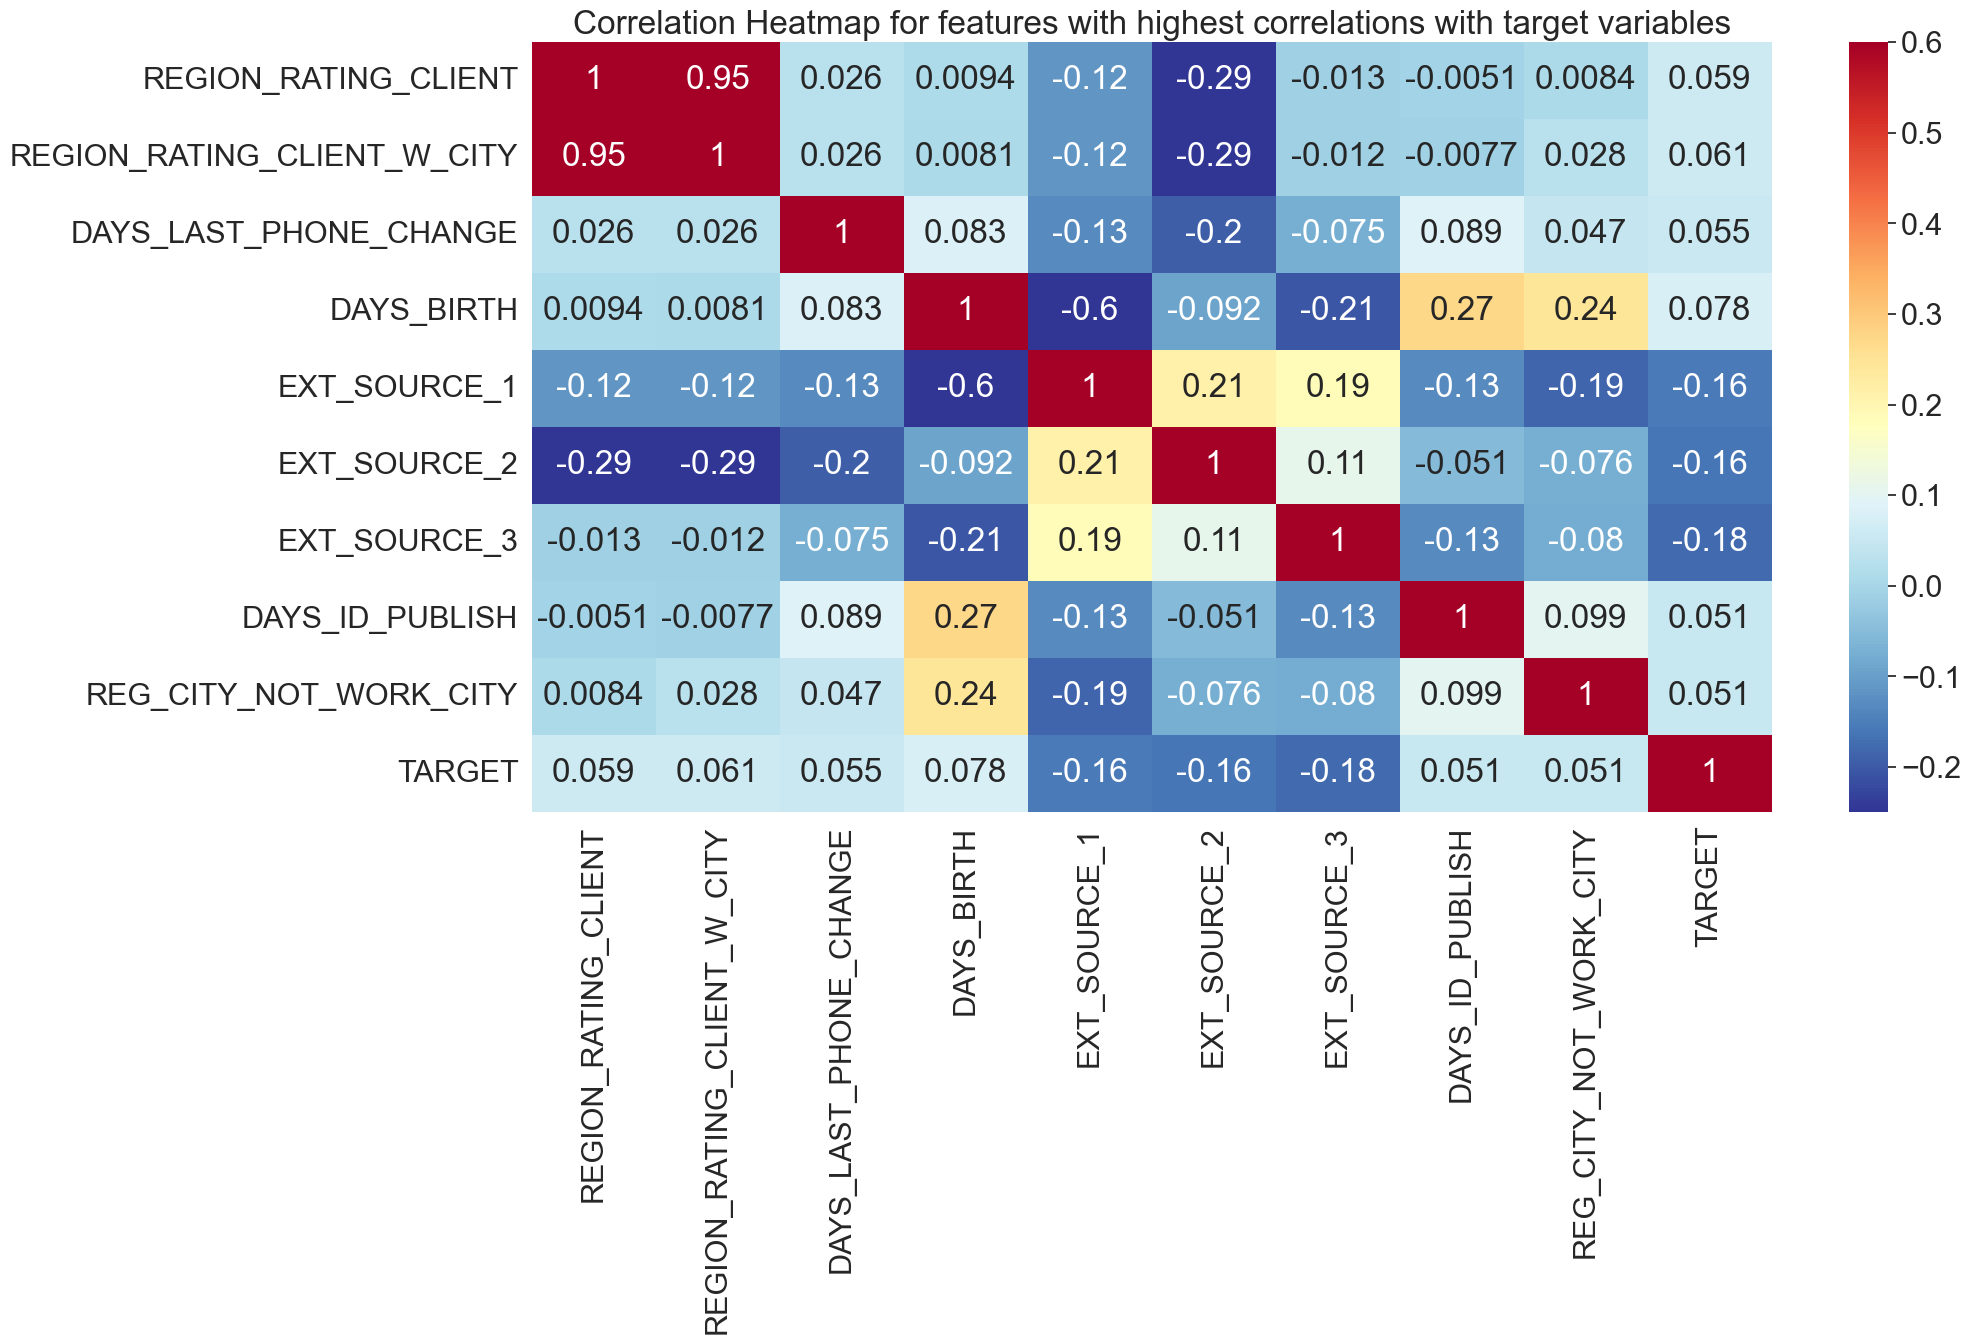

In [13]:
most_corr=datasets["application_train"][["REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","DAYS_LAST_PHONE_CHANGE",
               "DAYS_BIRTH", "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3", "DAYS_ID_PUBLISH","REG_CITY_NOT_WORK_CITY",'TARGET']]
most_corr_corr = most_corr.corr()

sns.set_style("dark")
sns.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 1.0})
fig, axes = plt.subplots(figsize = (20,10),sharey=True)
sns.heatmap(most_corr_corr,cmap=plt.cm.RdYlBu_r,vmin=-0.25,vmax=0.6,annot=True)
plt.title('Correlation Heatmap for features with highest correlations with target variables')


# Feature Engineering:

In the process of feature engineering, we have utilized three tables namely, "Previous Applications", "Installment Payments", and "Credit Card Balance", from the secondary tables. 

To identify the best customers of an organization, RFM features are employed. These features are based on three metrics: Recency, Frequency, and Monetary Value.
- **Recency** measures how recent the customer made a purchase
- **Frequency** determines how often they make purchases
- **Monetary Value** denotes how much money they spend on each purchase. 

The frequency and monetary value metrics are indicative of the customer's engagement and their lifetime value, while recency is an indicator of retention and engagement. 

Since we are analyzing the spending patterns of customers in this project, we use the RFM method to create features. 

These features are generated by applying various functions such as **min, max, mean, sum, and count** to the relevant columns of the tables, thus producing new features that are significant for analysis.

# Joining secondary tables with the primary table

In the case of the HCDR competition (and many other machine learning problems that involve multiple tables in 3NF or not)  we need to join these datasets (denormalize) when using a machine learning pipeline. Joining the secondary tables with the primary table will lead to lots of new features about each loan application; these features will tend to be aggregate type features or meta data about the loan or its application. How can we do this when using Machine Learning Pipelines?

## Joining `previous_application` with `application_x`
We refer to the `application_train` data (and also `application_test` data also) as the **primary table** and the other files as the **secondary tables** (e.g., `previous_application` dataset). All tables can be joined using the primary key `SK_ID_PREV`.

Let's assume we wish to generate a feature based on previous application attempts. In this case, possible features here could be:

* A simple feature could be the number of previous applications.
* Other summary features of original features such as `AMT_APPLICATION`, `AMT_CREDIT` could be based on average, min, max, median, etc.
 
To build such features, we need to join the `application_train` data (and also `application_test` data also) with the 'previous_application' dataset (and the other available datasets).

When joining this data in the context of pipelines, different strategies come to mind with various tradeoffs:

1. Preprocess each of the non-application data sets, thereby generating many new (derived) features, and then joining (aka merge) the results with the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset) prior to processing the data (in a train, valid, test partition) via your machine learning pipeline. [This approach is recommended for this HCDR competition. WHY?]

* Do the joins as part of the transformation steps. [Not recommended here. WHY?]. How can this be done? Will it work?
  * This would be necessary if we had dataset wide features such as IDF (inverse document frequency) which depend on the entire subset of data as opposed to a single loan application (e.g., a feature about the relative amount applied for such as the percentile of the loan amount being applied for).
 
I want you to think about this section and build on this.

## Roadmap for secondary table processing

1. Transform all the secondary tables to features that can be joined into the main table the application table (labeled and unlabeled)
   * 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
   * 'previous_application', 'POS_CASH_balance'
* Merge the transformed secondary tables with the primary tables (i.e., the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset)), thereby leading to X_train, y_train, X_valid, etc.
* Proceed with the learning pipeline using X_train, y_train, X_valid, etc.
* Generate a submission file using the learnt model


### Feature transformer

In [14]:
# Create aggregate features (via pipeline)
class FeaturesAggregater(BaseEstimator, TransformerMixin):

    def __init__(self, features=None, agg_needed=["mean"]): # no *args or **kargs self.features = features
        self.agg_needed = agg_needed
        self.agg_op_features = {}
        for f in features:
            self.agg_op_features[f] = self.agg_needed[:]
    def fit(self, X, y=None): 
        return self
    def transform(self, X, y=None):
        result = X.groupby(["SK_ID_CURR"]).agg(self.agg_op_features) 
        df_result = pd.DataFrame()
        for x1, x2 in result.columns:
            new_col = x1 + "_" + x2
            df_result[new_col] = result[x1][x2]
            df_result = df_result.reset_index(level=["SK_ID_CURR"]) 
            return df_result


#### Fixing Column names after Pandas agg() function to summarize grouped data
Since we have both the variable name and the operation performed in two rows in the Multi-Index dataframe, we can use that and name our new columns correctly.

For more details unstacking groupby results and examples please see [here](https://cmdlinetips.com/2020/05/fun-with-pandas-groupby-aggregate-multi-index-and-unstack/)




For more details and examples please see [here](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)

### Missing values in previous application table

In [15]:
# Access the 'previous_application' dataset from the 'datasets' container and assign it to a variable named 'previous_application_data'
previous_application_data = datasets["previous_application"]

# Apply the 'isna()' method on the 'previous_application_data' DataFrame to detect missing or null values, 
# and then apply the 'sum()' method to count the number of missing values in each column of the DataFrame.
missing_values_count_per_column = previous_application_data.isna().sum()
missing_values_count_per_column

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

## Feature engineering for prevApp table

The groupby output will have an index or multi-index on rows corresponding to your chosen grouping variables. To avoid setting this index, pass “as_index=False” to the groupby operation.

```python
import pandas as pd
import dateutil

# Load data from csv file
data = pd.DataFrame.from_csv('phone_data.csv')
# Convert date from string to date times
data['date'] = data['date'].apply(dateutil.parser.parse, dayfirst=True)

data.groupby('month', as_index=False).agg({"duration": "sum"})
```
Pandas `reset_index()` to convert Multi-Index to Columns
We can simplify the multi-index dataframe using reset_index() function in Pandas. By default, Pandas reset_index() converts the indices to columns.

Columns on which the feature engineering is performed include "AMT_APPLICATION", "AMT_CREDIT", "AMT_ANNUITY", "approved_credit_ratio", "AMT_ANNUITY_credit_ratio", "Interest_ratio", "LTV_ratio", "SK_ID_PREV", "approved".

We have derived five new features from the previously mentioned features. 

- The first feature is the **approved_credit_ratio**, which is the ratio of the credit amount the client requested on their previous application to the final credit amount approved on that application. 

- The second feature is the **AMT_ANNUITY_credit_ratio**, which is the ratio of the annuity amount of the previous application to the final credit amount approved on that application. 

- The third feature is the **Interest_ratio**, which is the ratio of the annuity amount of the previous application to the final credit amount approved on that application. 

- The fourth feature is the **LTV_ratio**, which is the ratio of the final credit amount approved on the previous application to the goods price of the product the client applied for (if applicable) on the previous application. 

- The fifth and final feature is the **approved**, which takes a value of 1 if the credit amount approved on the previous application is greater than 0, indicating that the application was approved.

In [16]:
previous_feature = ["AMT_APPLICATION", "AMT_CREDIT", "AMT_ANNUITY", "approved_credit_ratio", "AMT_ANNUITY_credit_ratio", "Interest_ratio", "LTV_ratio", "SK_ID_PREV", "approved"]
agg_needed = ["min", "max", "mean", "count", "sum"]


agg_needed = ["min", "max", "mean", "count", "sum"]

def previous_feature_aggregation(df, feature, agg_needed):
    df['approved_credit_ratio'] = (df['AMT_APPLICATION']/df['AMT_CREDIT']).replace(np.inf, 0)
    # installment over credit approved ratio
    df['AMT_ANNUITY_credit_ratio'] = (df['AMT_ANNUITY']/df['AMT_CREDIT']).replace(np.inf, 0)
    # total interest payment over credit ratio
    df['Interest_ratio'] = (df['AMT_ANNUITY']/df['AMT_CREDIT']).replace(np.inf, 0)
    #  loan cover ratio
    df['LTV_ratio'] = (df['AMT_CREDIT']/df['AMT_GOODS_PRICE']).replace(np.inf, 0)
    df['approved'] = np.where(df.AMT_CREDIT >0 ,1, 0)
    
    test_pipeline = make_pipeline(FeaturesAggregater(feature, agg_needed))
    return(test_pipeline.fit_transform(df))
    
datasets['previous_application_agg'] = previous_feature_aggregation(datasets["previous_application"], previous_feature, agg_needed)

### Missing value after the feature engineering

In [17]:
datasets["previous_application_agg"].isna().sum()

SK_ID_CURR             0
AMT_APPLICATION_min    0
dtype: int64

### Missing values in Installment payments

In [18]:
datasets["installments_payments"].isna().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

### Feature Engineering for Installment payments

Columns on which the feature engineering is performed include **"DAYS_INSTALMENT_DIFF", "AMT_PATMENT_PCT"**.

From the previous features, we have generated two additional features. 

- The first feature is called **DAYS_INSTALMENT_DIFF**, which is the difference between the date when the installment of the previous credit was due and the actual date when it was paid. 

- The second feature is the **AMT_PATMENT_PCT**, which represents the percentage of the prescribed installment amount of the previous credit that the client actually paid on a particular installment, for every entry in the dataset.

In [19]:
payments_features = ["DAYS_INSTALMENT_DIFF", "AMT_PATMENT_PCT"]

agg_needed = ["mean"]

def payments_feature_aggregation(df, feature, agg_needed):
    df['DAYS_INSTALMENT_DIFF'] = df['DAYS_INSTALMENT'] - df['DAYS_ENTRY_PAYMENT']
    df['AMT_PATMENT_PCT'] = [x/y if (y != 0) & pd.notnull(y) else np.nan for x,y in zip(df.AMT_PAYMENT,df.AMT_INSTALMENT)]
    
    test_pipeline = make_pipeline(FeaturesAggregater(feature, agg_needed))
    return(test_pipeline.fit_transform(df))
    
datasets['installments_payments_agg'] = payments_feature_aggregation(datasets["installments_payments"], payments_features, agg_needed)

### Missing value after the feature engineering

In [20]:
datasets["installments_payments_agg"].isna().sum()

SK_ID_CURR                   0
DAYS_INSTALMENT_DIFF_mean    9
dtype: int64

### Missing value in  Credit card balance

In [21]:
datasets["credit_card_balance"].isna().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

### Feature Engineering for Credit card balance

Columns on which the feature engineering is performed include **"AMT_BALANCE", "AMT_DRAWINGS_PCT", "AMT_DRAWINGS_ATM_PCT", "AMT_DRAWINGS_OTHER_PCT", "AMT_DRAWINGS_POS_PCT", "AMT_PRINCIPAL_RECEIVABLE_PCT", "CNT_DRAWINGS_ATM_CURRENT", "CNT_DRAWINGS_CURRENT", "CNT_DRAWINGS_OTHER_CURRENT", "CNT_DRAWINGS_POS_CURRENT", "SK_DPD", "SK_DPD_DEF"**.

We have generated five new features using the previous features mentioned. 

- The first feature is called **AMT_DRAWINGS_PCT**, which represents the ratio of the amount drawn during the previous credit month to the credit card limit during that month. 

- The second feature is **AMT_DRAWINGS_ATM_PCT**, which is the ratio of the amount drawn at an ATM during the previous credit month to the credit card limit during that month. 

- The third feature is **AMT_DRAWINGS_OTHER_PCT**, which is the ratio of the amount drawn for other purposes during the previous credit month to the credit card limit during that month. 

- The fourth feature is **AMT_DRAWINGS_POS_PCT**, which is the ratio of the amount drawn or spent on goods during the previous credit month to the credit card limit during that month. 

- Finally, the fifth feature is **MT_PRINCIPAL_RECEIVABLE_PCT**, which represents the ratio of the amount receivable for principal on the previous credit to the total amount receivable on that credit.

In [22]:
credit_features = [
    "AMT_BALANCE",
    "AMT_DRAWINGS_PCT",
    "AMT_DRAWINGS_ATM_PCT",
    "AMT_DRAWINGS_OTHER_PCT",
    "AMT_DRAWINGS_POS_PCT",
    "AMT_PRINCIPAL_RECEIVABLE_PCT",
    "CNT_DRAWINGS_ATM_CURRENT",
    "CNT_DRAWINGS_CURRENT",
    "CNT_DRAWINGS_OTHER_CURRENT",
    "CNT_DRAWINGS_POS_CURRENT",
    "SK_DPD",
    "SK_DPD_DEF",
]

agg_needed = ["mean"]


def calculate_pct(x, y):
    return x / y if (y != 0) & pd.notnull(y) else np.nan
#def pct(x, y):
    #return x / y if (y != 0) & pd.notnull(y) else np.nan


def credit_feature_aggregation(df, feature, agg_needed):
    pct_columns = [
        ("AMT_DRAWINGS_CURRENT", "AMT_DRAWINGS_PCT"),
        ("AMT_DRAWINGS_ATM_CURRENT", "AMT_DRAWINGS_ATM_PCT"),
        ("AMT_DRAWINGS_OTHER_CURRENT", "AMT_DRAWINGS_OTHER_PCT"),
        ("AMT_DRAWINGS_POS_CURRENT", "AMT_DRAWINGS_POS_PCT"),
        ("AMT_RECEIVABLE_PRINCIPAL", "AMT_PRINCIPAL_RECEIVABLE_PCT"),
    ]

    for col_x, col_pct in pct_columns:
        df[col_pct] = [calculate_pct(x, y) for x, y in zip(df[col_x], df["AMT_CREDIT_LIMIT_ACTUAL"])]

    pipeline = make_pipeline(FeaturesAggregater(feature, agg_needed))
    return pipeline.fit_transform(df)


datasets["credit_card_balance_agg"] = credit_feature_aggregation(
    datasets["credit_card_balance"], credit_features, agg_needed
)


### Missing values after feature engineering

In [23]:
datasets["credit_card_balance_agg"].isna().sum()

SK_ID_CURR          0
AMT_BALANCE_mean    0
dtype: int64

## Join the feature engineered datasets with under-sampled datasets

In [24]:
# Load the train dataset
train_data = datasets["application_train"]

# Compute the distribution of the target variable
target_counts = train_data['TARGET'].value_counts()

# Display the target distribution
print("Target variable distribution:\n")
print(target_counts)
print("\n")

# Compute the percentage of positive and negative examples in the dataset
positive_count = target_counts[1]
negative_count = target_counts[0]
total_count = positive_count + negative_count
positive_percentage = (positive_count / total_count) * 100
negative_percentage = (negative_count / total_count) * 100

# Display the percentages of positive and negative examples
print(f"Percentage of positive examples: {positive_percentage:.2f}%")
print(f"Percentage of negative examples: {negative_percentage:.2f}%")


Target variable distribution:

0    282686
1     24825
Name: TARGET, dtype: int64


Percentage of positive examples: 8.07%
Percentage of negative examples: 91.93%


In [25]:
train_dataset= datasets["undersampled_application_train"] #primary dataset
    
merge_all_data = True

# merge primary table and secondary tables using features based on meta data and  aggregage stats 
if merge_all_data:
    # 1. Join/Merge in prevApps Data
    train_dataset = train_dataset.merge(datasets["previous_application_agg"], how='left', on='SK_ID_CURR')

    # 2. Join/Merge in Installments Payments  Data
    train_dataset = train_dataset.merge(datasets["installments_payments_agg"], how='left', on="SK_ID_CURR")

    # 3. Join/Merge in Credit Card Balance Data
    train_dataset = train_dataset.merge(datasets["credit_card_balance_agg"], how='left', on="SK_ID_CURR")

In [26]:
datasets["undersampled_application_train_4"] = train_dataset

In [27]:
train_dataset.shape

(99825, 125)

In [28]:
train_dataset = datasets["undersampled_application_train_2"]
train_dataset = train_dataset.merge(datasets["previous_application_agg"], how='left', on='SK_ID_CURR')
train_dataset = train_dataset.merge(datasets["installments_payments_agg"], how='left', on="SK_ID_CURR")
train_dataset = train_dataset.merge(datasets["credit_card_balance_agg"], how='left', on="SK_ID_CURR")
train_dataset = train_dataset.drop(columns = 'weight')
datasets["undersampled_application_train_4_2"] = train_dataset

In [29]:
train_dataset.shape

(49650, 125)

In [30]:
train_dataset.to_csv('train_dataset.csv', index=False) 


## Join the unlabeled dataset (i.e., the submission file)

In [31]:
X_kaggle_test= datasets["application_test"]

# merge primary table and secondary tables using features based on meta data and  aggregage stats 
if merge_all_data:
    # 1. Join/Merge in prevApps Data
    X_kaggle_test = X_kaggle_test.merge(datasets["previous_application_agg"], how='left', on='SK_ID_CURR')

    # 2. Join/Merge in Installments Payments  Data
    X_kaggle_test = X_kaggle_test.merge(datasets["installments_payments_agg"], how='left', on="SK_ID_CURR")

    # 3. Join/Merge in Credit Card Balance Data
    X_kaggle_test = X_kaggle_test.merge(datasets["credit_card_balance_agg"], how='left', on="SK_ID_CURR")
    
    

In [32]:
X_kaggle_test.to_csv('X_kaggle_test.csv', index=False) 

# Loss Functions

## LOG LOSS
Logarithmic Loss (logloss) is a measure used to evaluate the performance of a classification model, especially in the context of binary and multiclass classification problems. It quantifies how well the predicted probabilities of the model align with the true class labels. Logloss is a logarithmic scoring function that penalizes models more heavily for confidently incorrect predictions.

$$ \operatorname{LogLoss} =  -\frac{1}{m}\sum^m_{i=1}\left(y_i\cdot\:\log\:\left(p_i\right)\:+\:\left(1-y_i\right)\cdot\log\left(1-p_i\right)\right) + \lambda \sum_{j=1}^{n}|\theta_j| $$

\begin{align*}
m & : \text{Number of samples in the dataset.} \\
y_i & : \text{True label for the } i\text{-th sample (0 or 1).} \\
p_i & : \text{Predicted probability that the } i\text{-th sample belongs to the positive class.} \\
\lambda & : \text{Regularization parameter.} \\
\theta_j & : \text{Model parameters (coefficients) associated with the features.} \\
n & : \text{Number of features.}
\end{align*}


## Entropy
Entropy, in the context of information theory, is a measure of uncertainty or disorder in a set of probabilities associated with possible outcomes. The formula you provided is the expression for entropy in the context of a discrete probability distribution.

$$ H(p) = -\sum_{i=1}^{c} p_i \log_2(p_i) $$

\begin{align*}
H(p) &: \text{Entropy, representing the amount of uncertainty or disorder.}\\
c &: \text{The number of possible classes or outcomes.}\\
p_i &: \text{The probability associated with the } i\text{-th class or outcome.}\\
\end{align*}

## Squared Hinge Loss
The squared hinge loss is a loss function commonly used in the context of support vector machines (SVMs). It penalizes misclassifications and encourages correct classification with a margin. The formula is as follows:

$$ \operatorname{SquareHingeLoss} = \frac{1}{m}\sum^m_{i=1}\left[\max\left(0, 1 - y_i\left(\theta^T \cdot x_i + b\right)\right)^2\right] + \lambda \sum_{j=1}^{n}\theta_j^2 $$

\begin{align*}
& m: \text{The number of training examples.} \\
& i: \text{The index of a training example.} \\
& x_i: \text{The feature vector of the } i\text{-th training example.} \\
& \theta: \text{The parameter vector.} \\
& b: \text{The bias term.} \\
& y_i: \text{The true label of the } i\text{-th training example.} \\
& \max(0, 1 - y_i(\theta^T \cdot x_i + b))^2: \text{The squared hinge loss for a single training example.} \\
& \lambda: \text{Regularization parameter.} \\
& \sum_{j=1}^{n} \theta_j^2: \text{L2 regularization term.}
\end{align*}

## Gini Impurity
Gini Impurity is a measure of impurity or disorder used in the context of decision trees and machine learning. It represents the probability of incorrectly classifying a randomly chosen element in the dataset.

$$ S = \sum_{i=1}^{c} p_i (1 - p_i) $$

\begin{align*}
S & : \text{Gini Impurity} \\
c & : \text{Number of possible classes or outcomes} \\
p_i & : \text{Probability associated with the } i\text{-th class or outcome}
\end{align*}

# Evaluation metrics

The evaluation of submissions is conducted through the calculation of the area under the ROC curve, which measures the relationship between the predicted probability and the observed target. The SkLearn roc_auc_score function is utilized to compute the AUC or AUROC, effectively summarizing the information contained in the ROC curve into a single numerical value.
Submissions are evaluated on [area under the ROC curve](http://en.wikipedia.org/wiki/Receiver_operating_characteristic) between the predicted probability and the observed target.

The SkLearn `roc_auc_score` function computes the area under the receiver operating characteristic (ROC) curve, which is also denoted by AUC or AUROC. By computing the area under the roc curve, the curve information is summarized in one number. 

```python
from sklearn.metrics import roc_auc_score
>>> y_true = np.array([0, 0, 1, 1])
>>> y_scores = np.array([0.1, 0.4, 0.35, 0.8])
>>> roc_auc_score(y_true, y_scores)
0.75
```

## Accuracy

It refers to the proportion of accurately classified data instances in relation to the overall number of data instances.

$$ \operatorname{Accuracy} =  \frac{TN+TP}{TN+FP+TP+FN}\ $$

\begin{align*}
TN & : \text{True Negative (instances correctly predicted as negative)} \\
TP & : \text{True Positive (instances correctly predicted as positive)} \\
FP & : \text{False Positive (instances incorrectly predicted as positive)} \\
FN & : \text{False Negative (instances incorrectly predicted as negative)}
\end{align*}

## Precision:
    
Precision refers to the ratio of true positives to the sum of true positives and false positives.

$$ \operatorname{Precision} =  \frac{TP}{TP+FP}\ $$
\begin{align*}
TP & : \text{True Positive (instances correctly predicted as positive)} \\
FP & : \text{False Positive (instances incorrectly predicted as positive)} \\
\end{align*}

## F1 SCORE 
It is the harmonic mean of accuracy and recall, taking into account both false positives and false negatives. It is a useful metric for evaluating models on imbalanced datasets.

$$ \operatorname{F1Score} =  \frac{Precision * Recall}{Precision + Recall}\ $$

## RECALL 
It denotes the fraction of positive instances that are correctly identified as positive by the model. This metric is equivalent to the TPR (True Positive Rate).
$$ \operatorname{Recall} =  \frac{TP}{TP+FN}\ $$
\begin{align*}
TP & : \text{True Positive (instances correctly predicted as positive)} \\
FP & : \text{False Positive (instances incorrectly predicted as positive)} \\
FN & : \text{False Negative (instances incorrectly predicted as negative)}
\end{align*}

## CONFUSION MATRIX
It is a tabular representation consisting of two axes - one representing the actual values and the other representing the predicted values. The matrix is of size 2x2 and is commonly used in classification tasks to assess the performance of a model.

### Create confusion matrix for baseline model

In [33]:
class_labels = ["No Default","Default"]
import numpy as np
from sklearn.metrics import confusion_matrix

def confusion_matrix_normalized(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    cm_train = confusion_matrix(y_train, y_train_pred, normalize='true').astype(np.float32)
    cm_test = confusion_matrix(y_test, y_test_pred, normalize='true').astype(np.float32)

    return cm_train, cm_test


# Processing pipeline

In [34]:
# Create a class to select numerical or categorical columns
from sklearn.base import BaseEstimator, TransformerMixin

# Create a transformer to select numerical or categorical columns
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.columns].values

In [35]:
def pct(x):
    return round(100*x,3)

# Empirical Findings 

## Tracking results in dataframe

In [36]:
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "description",
                                   "Train Time (sec)",
                                   "Test Time (sec)", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC", 
                                   "Train F1 Score",
                                   "Valid F1 Score",
                                   "Test F1 Score"
                                  ])


In [37]:
def get_results(expLog, exp_name, description, model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test):
    expLog.loc[len(expLog)] = [f"{exp_name}", description] + list(np.round(
               [train_time, test_time, 
                accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
                f1_score(y_train, model.predict(X_train)), 
                f1_score(y_valid, model.predict(X_valid)), 
                f1_score(y_test, model.predict(X_test))],
    4))
    return expLog


##  OHE when previously unseen unique values in the test/validation set

Train, validation and Test sets (and the leakage problem we have mentioned previously):

 

Let's look at a small usecase to tell us how to deal with this:

* The OneHotEncoder is fitted to the training set, which means that for each unique value present in the training set, for each feature, a new column is created. Let's say we have 39 columns after the encoding up from 30 (before preprocessing).
* The output is a numpy array (when the option sparse=False is used), which has the disadvantage of losing all the information about the original column names and values.
* When we try to transform the test set, after having fitted the encoder to the training set, we obtain a `ValueError`. This is because the there are new, previously unseen unique values in the test set and the encoder doesn’t know how to handle these values. In order to use both the transformed training and test sets in machine learning algorithms, we need them to have the same number of columns.

This last problem can be solved by using the option handle_unknown='ignore'of the OneHotEncoder, which, as the name suggests, will ignore previously unseen values when transforming the test set.

 

Here is a example that in action:

```python
# Identify the categorical features we wish to consider.
cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

# Notice handle_unknown="ignore" in OHE which ignore values from the validation/test that
# do NOT occur in the training set
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

```


# MACHINE LEARNING PIPELINES

## HCDR preprocessing with all columns

In [38]:
#TODO: block diagram

### Selecting the numerical and categorical features

In [39]:
# Load the undersampled training dataset
train_dataset = datasets["undersampled_application_train_4"]

# Separate numerical and categorical features
numerical_features = []
categorical_features = []

for feature_name in train_dataset:
    # Check if feature is numerical or categorical
    if train_dataset[feature_name].dtype in [np.float64, np.int64]:
        numerical_features.append(feature_name)
    else:
        categorical_features.append(feature_name)

# Remove target and ID columns from numerical features
numerical_features.remove('TARGET')
numerical_features.remove('SK_ID_CURR')

# Define pipelines for categorical and numerical features
categorical_pipeline = Pipeline([
    ('selector', ColumnSelector(categorical_features)),  # Select categorical features
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent category
    ('one_hot_encoder', OneHotEncoder(sparse=False, handle_unknown="ignore"))  # One-hot encode categorical features
])

numerical_pipeline = Pipeline([
    ('selector', ColumnSelector(numerical_features)),  # Select numerical features
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('standard_scaler', StandardScaler()),  # Standardize numerical features
])

# Combine pipelines for numerical and categorical features
data_prep_pipeline = FeatureUnion(transformer_list=[
    ("numerical_pipeline", numerical_pipeline),
    ("categorical_pipeline", categorical_pipeline),
])  

# Compute the total number of features, as well as the number of numerical and categorical features
selected_features = numerical_features + categorical_features + ["SK_ID_CURR"]
total_features = f"Total Features: {len(selected_features)} - Numerical: {len(numerical_features)}, Categorical: {len(categorical_features)}"

print(total_features)  # Print the total number of features and their breakdown


Total Features: 124 - Numerical: 107, Categorical: 16


## Create Train and Test Datasets

In [40]:
y_train = train_dataset['TARGET']
X_train = train_dataset[selected_features]
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_kaggle_test= X_kaggle_test[selected_features]

print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

X train           shape: (72123, 124)
X validation      shape: (14974, 124)
X test            shape: (12728, 124)
X X_kaggle_test   shape: (48744, 124)


#  Experimental Models

In order to establish a benchmark for comparison, we shall employ the utilization of a logistic regression model, which will make use of certain preprocessed features, processed by our established pipeline.

For the HDCR project, a total of 9 machine learning models were constructed to accurately classify the credit defaluters . Among these models, the three best-performing ones were selected based on their superior performance metrics. These three models were then subject to hyperparameter tuning and feature selection to optimize their performance. The hyperparameter tuning involved fine-tuning the various parameters of the models to identify the optimal set of parameters that produce the highest accuracy, precision, and recall scores. Meanwhile, feature selection aimed to identify the most relevant features that are highly correlated with the target variable to eliminate irrelevant variables that may affect the accuracy of the models.

## Model-1 baseline using training columns for the application with LogisticRegression( )

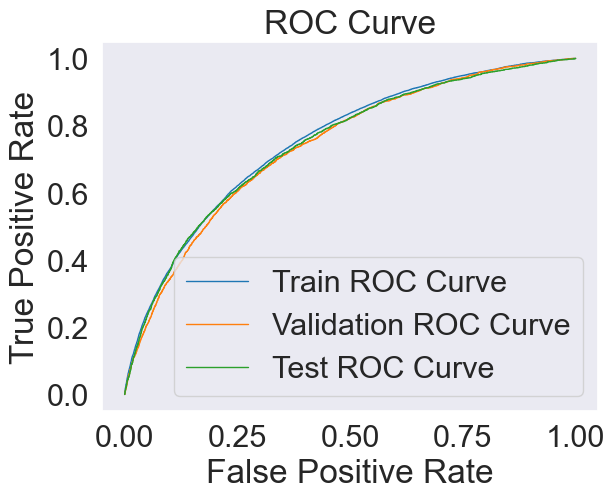

,exp_name,description,Train Time (sec),Test Time (sec),Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score
0,Model-1 Baseline LR,Logistic regression with undersampled data 124...,2.4318,0.088,0.7738,0.7638,0.7748,0.7539,0.7407,0.7462,0.3612,0.3272,0.3588


In [41]:
from sklearn.metrics import roc_curve
# Logistic Regression model with under-sampled data
np.random.seed(42)

# Define a pipeline that includes data preparation and logistic regression
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),  # Data preparation pipeline
        ("linear", LogisticRegression())  # Logistic Regression model
    ])

# Train the model and measure the training time
start_time = time.time()
model = full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time.time() - start_time, 4)

# Evaluate the model on the test set and measure the test time
start_time = time.time()
test_score = full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time.time() - start_time, 4)

# Define an experiment name based on the number of selected features
experiment_name = f"Model-1 Baseline LR"
experiment_description =f"Logistic regression with undersampled data {len(selected_features)} features"

# Log the results of the experiment
expLog = get_results(expLog, experiment_name,experiment_description, model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog


# Model Training and Validation
model.fit(X_train, y_train)

# Model Predictions
train_preds = model.predict_proba(X_train)[:, 1]
valid_preds = model.predict_proba(X_valid)[:, 1]
test_preds = model.predict_proba(X_test)[:, 1]

# Compute Metrics
train_fpr, train_tpr, _ = roc_curve(y_train, train_preds)
valid_fpr, valid_tpr, _ = roc_curve(y_valid, valid_preds)
test_fpr, test_tpr, _ = roc_curve(y_test, test_preds)
# Plot ROC Curve
plt.plot(train_fpr, train_tpr, label="Train ROC Curve")
plt.plot(valid_fpr, valid_tpr, label="Validation ROC Curve")
plt.plot(test_fpr, test_tpr, label="Test ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
expLog

### Creating data preparation pipeline from given columns

In [42]:
def get_pipeline(num_cols = None):
    # Load the undersampled training dataset and join with additional feature datasets
    train_dataset = datasets["undersampled_application_train_2"]
    train_dataset = train_dataset.merge(datasets["previous_application_agg"], how='left', on='SK_ID_CURR')
    train_dataset = train_dataset.merge(datasets["installments_payments_agg"], how='left', on="SK_ID_CURR")
    train_dataset = train_dataset.merge(datasets["credit_card_balance_agg"], how='left', on="SK_ID_CURR")

    # Separate numerical and categorical features
    numerical_features = []
    categorical_features = []
    for feature_name in train_dataset:
        if train_dataset[feature_name].dtype in [np.float64, np.int64]:
            numerical_features.append(feature_name)
        else:
            categorical_features.append(feature_name)

    # Remove unnecessary features
    numerical_features.remove('TARGET')
    numerical_features.remove('weight')
    numerical_features.remove('SK_ID_CURR')

    # Define pipelines for categorical and numerical features
    categorical_pipeline = Pipeline([
        ('selector', ColumnSelector(categorical_features)),  # Select categorical features
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent category
        ('one_hot_encoder', OneHotEncoder(sparse=False, handle_unknown="ignore"))  # One-hot encode categorical features
    ])
    
    # If columns are provided, use only those columns for numerical pipeline
    if num_cols == None:
        final_numerical_features = numerical_features
    else:
        final_numerical_features = num_cols
        
    numerical_pipeline = Pipeline([
        ('selector', ColumnSelector(final_numerical_features)),  # Select numerical features
        ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
        ('standard_scaler', StandardScaler()),  # Standardize numerical features
    ])

    # Combine pipelines for numerical and categorical features
    data_prep_pipeline = FeatureUnion(transformer_list=[
        ("numerical_pipeline", numerical_pipeline),
        ("categorical_pipeline", categorical_pipeline),
    ])  

    # Compute the total number of features, as well as the number of numerical and categorical features
    selected_features = final_numerical_features + categorical_features + ["SK_ID_CURR"]
    total_features = f"Total Features: {len(selected_features)} - Numerical: {len(final_numerical_features)}, Categorical: {len(categorical_features)}"

    # Print the total number of features and their breakdown
    print(total_features)

    return data_prep_pipeline, selected_features


### Creating Train, Test, and Validation datasets

In [43]:
# Load the undersampled training dataset and join with additional feature datasets
train_dataset = datasets["undersampled_application_train_2"]
train_dataset = train_dataset.merge(datasets["previous_application_agg"], how='left', on='SK_ID_CURR')
train_dataset = train_dataset.merge(datasets["installments_payments_agg"], how='left', on="SK_ID_CURR")
train_dataset = train_dataset.merge(datasets["credit_card_balance_agg"], how='left', on="SK_ID_CURR")

# Select the target variable
y_train = train_dataset['TARGET']

# Select the features for the training set
X_train = train_dataset[selected_features]

# Split the data into training and validation sets
# The training set will be used to train the model, and the validation set will be used to tune hyperparameters
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

# Split the training set into training and test sets
# The training set will be used to train the model, and the test set will be used to evaluate its performance
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

# Print the shapes of the training, validation, and test sets
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_valid.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (35871, 124)
Validation set shape: (7448, 124)
Test set shape: (6331, 124)


# Model-2 baseline using LogisticRegression( )

For establishing a baseline, we shall employ certain processed features stemming from the pipeline. The logistic regression model shall serve as the rudimentary benchmark model 2 . We will use two undersampled data here .

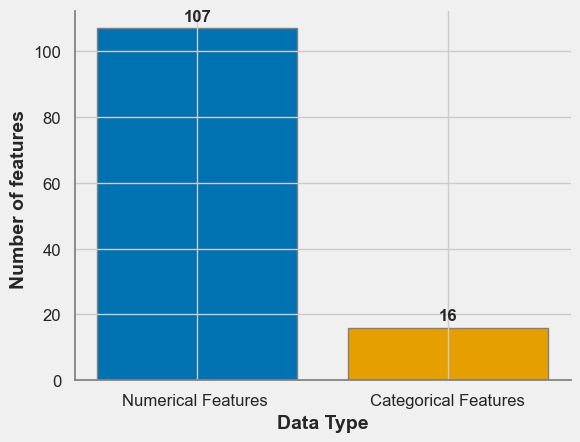

In [54]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

data = [len(numerical_features),len(categorical_features)]
labels = ['Numerical Features ', 'Categorical Features']

fig, ax = plt.subplots()
bars = ax.bar(labels, data, color=['#0072B2', '#E69F00'], edgecolor='black')

# Add shadows to the bars
for bar in bars:
    bar.set_edgecolor('gray')
    bar.set_linewidth(1)
    bar.set_zorder(0)

    # Add labels to the bars
    height = bar.get_height()
    ax.annotate(f'{height:.0f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom',
                fontsize=12, fontweight='bold')

# Customize the axis labels and ticks
ax.set_xlabel('Data Type', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of features ', fontsize=14, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)

# Customize the plot background
ax.set_facecolor('#F0F0F0')
fig.set_facecolor('#F0F0F0')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


Total Features: 124 - Numerical: 107, Categorical: 16
Cross-validation scores: [0.67953007 0.67992832 0.67905217]
Test score: 0.6904122571473701


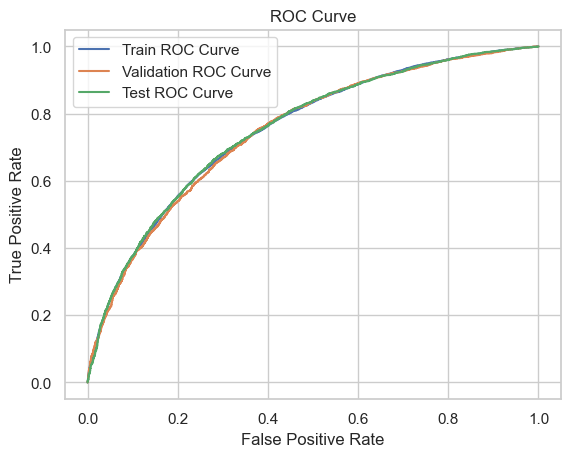

,exp_name,description,Train Time (sec),Test Time (sec),Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score
0,Model-1 Baseline LR,Logistic regression with undersampled data 124...,2.4318,0.0880,0.7738,0.7638,0.7748,0.7539,0.7407,0.7462,0.3612,0.3272,0.3588
1,Model-2 KNN,KNN with undersampled data-2 124 features,0.2857,2.8018,0.6950,0.6155,0.6184,0.7625,0.6571,0.6550,0.6992,0.6205,0.6226
2,Model-3 Decision Tree,Decision tree with undersampled data-2 124 fea...,1.3998,0.0388,0.6749,0.6535,0.6591,0.7380,0.7105,0.7129,0.6881,0.6678,0.6730
3,Model-4 Random Forest,Random Forest with undersampled data-2 124 fea...,17.3296,0.4940,0.7664,0.6654,0.6661,0.8504,0.7243,0.7273,0.7673,0.6631,0.6640
4,Model-5 Bagging Meta Estimator,Bagging Meta Estimator with undersampled data-...,8.2380,0.2080,0.9844,0.6477,0.6446,0.9990,0.6978,0.6983,0.9842,0.6210,0.6164
5,Model-7 XGBoost,XGBoost SAMME with undersampled data-2 124 fea...,5.6233,0.0837,0.7298,0.6929,0.6945,0.8102,0.7616,0.7610,0.7290,0.6922,0.6931
6,Model-12 CATBoost,CATBoost with undersampled data-2 124 features,10.1684,0.4436,0.6964,0.6904,0.6926,0.7671,0.7580,0.7591,0.6954,0.6901,0.6906
7,Model-12 CATBoost,CATBoost with undersampled data-2 124 features,13.1720,0.4564,0.6964,0.6904,0.6926,0.7671,0.7580,0.7591,0.6954,0.6901,0.6906
8,Model-2 Baseline LR,Logistic regression with undersampled data-2 1...,2.0058,0.0532,0.6876,0.6843,0.6904,0.7525,0.7489,0.7535,0.6865,0.6854,0.6900


In [55]:
# Set the random seed for reproducibility
np.random.seed(42)

# Create pipeline for preparing the data and select features
data_prep_pipeline, selected_features = get_pipeline()

# Join the preparation pipeline with logistic regression model
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("logistic_regression", LogisticRegression())
    ])

# Train the model on the training set
start = time.time()
model = full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time.time() - start, 4)

# Compute cross-validation scores
cv_splits = ShuffleSplit(n_splits=3, test_size=0.7, random_state=42)
logit_scores = cross_val_score(full_pipeline_with_predictor,X_train, y_train, cv=cv_splits)

print("Cross-validation scores:", logit_scores)

# Compute the test score
start = time.time()
test_score = full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time.time() - start, 4)

print("Test score:", test_score)

# Save the experiment results
exp_name = f"Model-2 Baseline LR"
experiment_description =f"Logistic regression with undersampled data-2 {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog



# Model Training and Validation
model.fit(X_train, y_train)

# Model Predictions
train_preds = model.predict_proba(X_train)[:, 1]
valid_preds = model.predict_proba(X_valid)[:, 1]
test_preds = model.predict_proba(X_test)[:, 1]

# Compute Metrics
train_fpr, train_tpr, _ = roc_curve(y_train, train_preds)
valid_fpr, valid_tpr, _ = roc_curve(y_valid, valid_preds)
test_fpr, test_tpr, _ = roc_curve(y_test, test_preds)
# Plot ROC Curve
plt.plot(train_fpr, train_tpr, label="Train ROC Curve")
plt.plot(valid_fpr, valid_tpr, label="Validation ROC Curve")
plt.plot(test_fpr, test_tpr, label="Test ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
expLog


## Model 3 - KNN model

Total Features: 124 - Numerical: 107, Categorical: 16
Test score: 0.6183857210551256


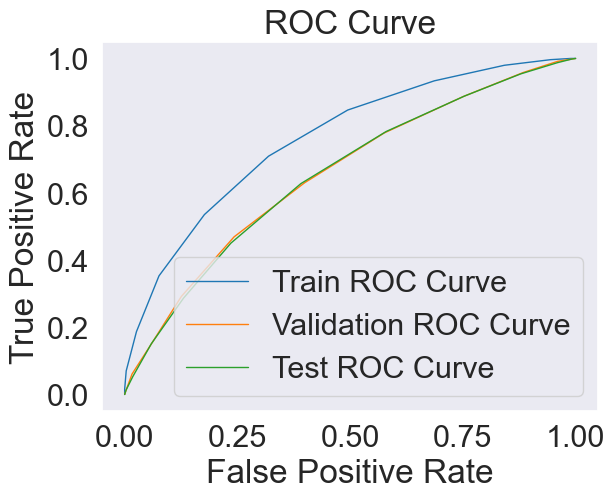

,exp_name,description,Train Time (sec),Test Time (sec),Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score
0,Model-1 Baseline LR,Logistic regression with undersampled data 124...,2.4318,0.0880,0.7738,0.7638,0.7748,0.7539,0.7407,0.7462,0.3612,0.3272,0.3588
1,Model-2 KNN,KNN with undersampled data-2 124 features,0.2857,2.8018,0.6950,0.6155,0.6184,0.7625,0.6571,0.6550,0.6992,0.6205,0.6226


In [44]:
from sklearn.neighbors import KNeighborsClassifier

# Set the random seed for reproducibility
np.random.seed(42)

# Create pipeline for preparing the data and select features
data_prep_pipeline, selected_features = get_pipeline()

# Join the preparation pipeline with KNN model
knn_full_pipeline_with_predictor = Pipeline([
    ("preparation", data_prep_pipeline),
    ("knn", KNeighborsClassifier(n_neighbors=11, p=2))
])

# Train the model on the training set
start = time.time()
model = knn_full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time.time() - start, 4)

# Compute the test score
start = time.time()
test_score = knn_full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time.time() - start, 4)

print("Test score:", test_score)

# Results
# Save the experiment results
exp_name = f"Model-3 KNN"
experiment_description =f"KNN with undersampled data-2 {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog

# Model Training and Validation
model.fit(X_train, y_train)

# Model Predictions
train_preds = model.predict_proba(X_train)[:, 1]
valid_preds = model.predict_proba(X_valid)[:, 1]
test_preds = model.predict_proba(X_test)[:, 1]

# Compute Metrics
train_fpr, train_tpr, _ = roc_curve(y_train, train_preds)
valid_fpr, valid_tpr, _ = roc_curve(y_valid, valid_preds)
test_fpr, test_tpr, _ = roc_curve(y_test, test_preds)
# Plot ROC Curve
plt.plot(train_fpr, train_tpr, label="Train ROC Curve")
plt.plot(valid_fpr, valid_tpr, label="Validation ROC Curve")
plt.plot(test_fpr, test_tpr, label="Test ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
expLog


## Model 4-Decision Tree

Total Features: 124 - Numerical: 107, Categorical: 16
Test score: 0.6591
Training time: 1.3998 sec
Test time: 0.0388 sec
Number of features: 124


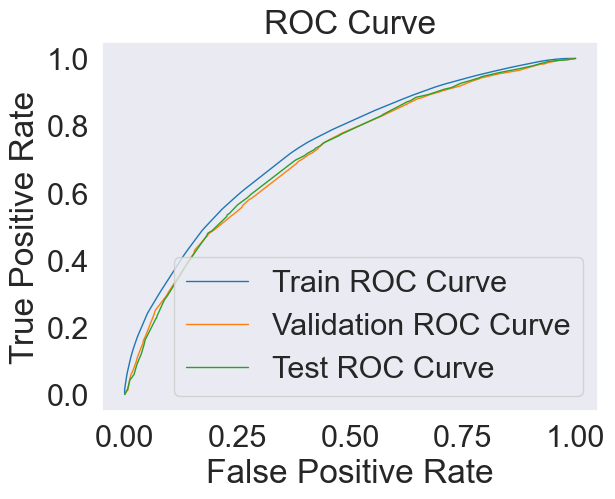

,exp_name,description,Train Time (sec),Test Time (sec),Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score
0,Model-1 Baseline LR,Logistic regression with undersampled data 124...,2.4318,0.0880,0.7738,0.7638,0.7748,0.7539,0.7407,0.7462,0.3612,0.3272,0.3588
1,Model-2 KNN,KNN with undersampled data-2 124 features,0.2857,2.8018,0.6950,0.6155,0.6184,0.7625,0.6571,0.6550,0.6992,0.6205,0.6226
2,Model-3 Decision Tree,Decision tree with undersampled data-2 124 fea...,1.3998,0.0388,0.6749,0.6535,0.6591,0.7380,0.7105,0.7129,0.6881,0.6678,0.6730


In [45]:
from sklearn.tree import DecisionTreeClassifier

np.random.seed(42)

# Create pipeline for preparing the data and select features
data_prep_pipeline, selected_features = get_pipeline()

# Join the preparation pipeline with Decision Tree model
decision_tree_full_pipeline_with_predictor = Pipeline([
    ("preparation", data_prep_pipeline),
    ("decision tree", DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=7, min_samples_leaf=5))
])

# Train the model on the training set
start = time.time()
model = decision_tree_full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time.time() - start, 4)

# Compute the test score
start = time.time()
test_score = decision_tree_full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time.time() - start, 4)

# Print the test score and other details
print(f"Test score: {test_score:.4f}")
print(f"Training time: {train_time} sec")
print(f"Test time: {test_time} sec")
#print(f"Selected features: {selected_features}")
print(f"Number of features: {len(selected_features)}")

# Results
# Save the experiment results
exp_name = f"Model-4 Decision Tree"
experiment_description =f"Decision tree with undersampled data-2 {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog
# Model Training and Validation
model.fit(X_train, y_train)

# Model Predictions
train_preds = model.predict_proba(X_train)[:, 1]
valid_preds = model.predict_proba(X_valid)[:, 1]
test_preds = model.predict_proba(X_test)[:, 1]

# Compute Metrics
train_fpr, train_tpr, _ = roc_curve(y_train, train_preds)
valid_fpr, valid_tpr, _ = roc_curve(y_valid, valid_preds)
test_fpr, test_tpr, _ = roc_curve(y_test, test_preds)
# Plot ROC Curve
plt.plot(train_fpr, train_tpr, label="Train ROC Curve")
plt.plot(valid_fpr, valid_tpr, label="Validation ROC Curve")
plt.plot(test_fpr, test_tpr, label="Test ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
expLog


## Model 5- Random Forest

Total Features: 124 - Numerical: 107, Categorical: 16
Training the model...
Training time:  17.3296
Evaluating the model on the test set...
Test score:  0.6660875059232348
Test time:  0.494


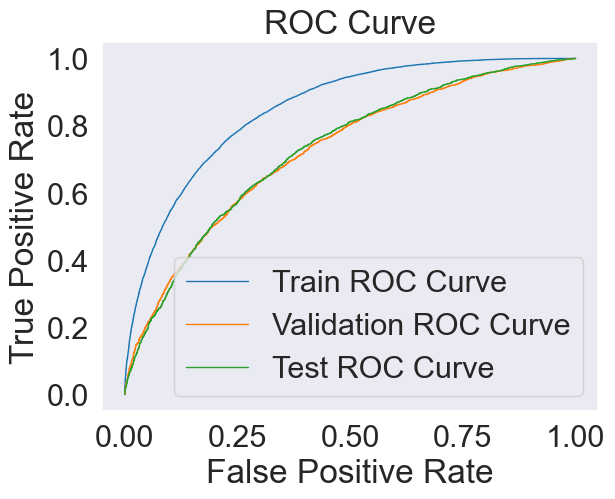

,exp_name,description,Train Time (sec),Test Time (sec),Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score
0,Model-1 Baseline LR,Logistic regression with undersampled data 124...,2.4318,0.0880,0.7738,0.7638,0.7748,0.7539,0.7407,0.7462,0.3612,0.3272,0.3588
1,Model-2 KNN,KNN with undersampled data-2 124 features,0.2857,2.8018,0.6950,0.6155,0.6184,0.7625,0.6571,0.6550,0.6992,0.6205,0.6226
2,Model-3 Decision Tree,Decision tree with undersampled data-2 124 fea...,1.3998,0.0388,0.6749,0.6535,0.6591,0.7380,0.7105,0.7129,0.6881,0.6678,0.6730
3,Model-4 Random Forest,Random Forest with undersampled data-2 124 fea...,17.3296,0.4940,0.7664,0.6654,0.6661,0.8504,0.7243,0.7273,0.7673,0.6631,0.6640


In [46]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Creating pipeline by joining numerical and categorical pipelines
data_prep_pipeline, selected_features = get_pipeline()

# Attaching random forest model to the above pipeline
random_forest_full_pipeline_with_predictor = Pipeline([
    ("preparation", data_prep_pipeline),
    ("random forest", RandomForestClassifier(random_state=42, bootstrap=True, max_depth=20, 
                      max_features=5, min_samples_leaf=10, min_samples_split=15, n_estimators=500))
])

# Training the model
print("Training the model...")
start_time = time.time()
model = random_forest_full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time.time() - start_time, 4)
print("Training time: ", train_time)

# Evaluate the model on the test set and measure the test time
print("Evaluating the model on the test set...")
start_time = time.time()
score_test  = random_forest_full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time.time() - start_time, 4)
print("Test score: ", score_test)
print("Test time: ", test_time)


# Results
exp_name = f"Model-5 Random Forest "
experiment_description =f"Random Forest with undersampled data-2 {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog
# Model Training and Validation
model.fit(X_train, y_train)

# Model Predictions
train_preds = model.predict_proba(X_train)[:, 1]
valid_preds = model.predict_proba(X_valid)[:, 1]
test_preds = model.predict_proba(X_test)[:, 1]

# Compute Metrics
train_fpr, train_tpr, _ = roc_curve(y_train, train_preds)
valid_fpr, valid_tpr, _ = roc_curve(y_valid, valid_preds)
test_fpr, test_tpr, _ = roc_curve(y_test, test_preds)
# Plot ROC Curve
plt.plot(train_fpr, train_tpr, label="Train ROC Curve")
plt.plot(valid_fpr, valid_tpr, label="Validation ROC Curve")
plt.plot(test_fpr, test_tpr, label="Test ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
expLog

## Model 6-Bagging Meta Estimator 

Total Features: 124 - Numerical: 107, Categorical: 16


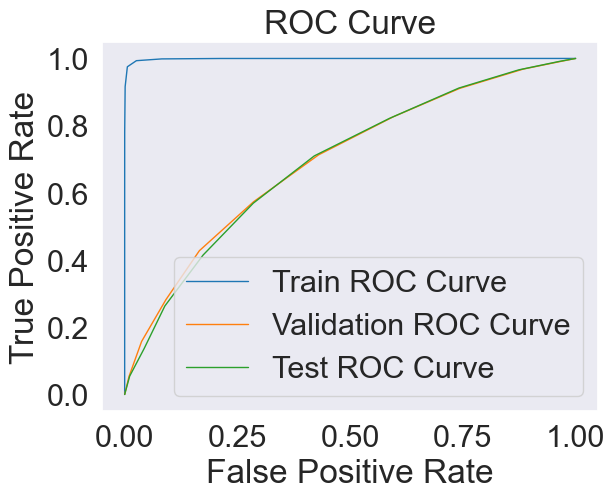

,exp_name,description,Train Time (sec),Test Time (sec),Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score
0,Model-1 Baseline LR,Logistic regression with undersampled data 124...,2.4318,0.0880,0.7738,0.7638,0.7748,0.7539,0.7407,0.7462,0.3612,0.3272,0.3588
1,Model-2 KNN,KNN with undersampled data-2 124 features,0.2857,2.8018,0.6950,0.6155,0.6184,0.7625,0.6571,0.6550,0.6992,0.6205,0.6226
2,Model-3 Decision Tree,Decision tree with undersampled data-2 124 fea...,1.3998,0.0388,0.6749,0.6535,0.6591,0.7380,0.7105,0.7129,0.6881,0.6678,0.6730
3,Model-4 Random Forest,Random Forest with undersampled data-2 124 fea...,17.3296,0.4940,0.7664,0.6654,0.6661,0.8504,0.7243,0.7273,0.7673,0.6631,0.6640
4,Model-5 Bagging Meta Estimator,Bagging Meta Estimator with undersampled data-...,8.2380,0.2080,0.9844,0.6477,0.6446,0.9990,0.6978,0.6983,0.9842,0.6210,0.6164


In [47]:
from sklearn.ensemble import BaggingClassifier

np.random.seed(42)

# creating pipeline by joining numerical and categorical pipelines
data_prep_pipeline, selected_features = get_pipeline()

# Attaching bagging meta-estimator to the above pipeline
bagging_full_pipeline_with_predictor = Pipeline([
    ("preparation", data_prep_pipeline),
    ("bagging", BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, 
                                   bootstrap=True, bootstrap_features=False, n_jobs=-1, random_state=None, 
                                   verbose=0, warm_start=False))
])

# Training the model
start = time.time()
model = bagging_full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time.time() - start, 4)

start = time.time()
score_test  = bagging_full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time.time() - start, 4)

# Results
exp_name = f"Model-6 Bagging Meta Estimator "
experiment_description =f"Bagging Meta Estimator with undersampled data-2 {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog




# Model Training and Validation
model.fit(X_train, y_train)

# Model Predictions
train_preds = model.predict_proba(X_train)[:, 1]
valid_preds = model.predict_proba(X_valid)[:, 1]
test_preds = model.predict_proba(X_test)[:, 1]

# Compute Metrics
train_fpr, train_tpr, _ = roc_curve(y_train, train_preds)
valid_fpr, valid_tpr, _ = roc_curve(y_valid, valid_preds)
test_fpr, test_tpr, _ = roc_curve(y_test, test_preds)
# Plot ROC Curve
plt.plot(train_fpr, train_tpr, label="Train ROC Curve")
plt.plot(valid_fpr, valid_tpr, label="Validation ROC Curve")
plt.plot(test_fpr, test_tpr, label="Test ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
expLog


## Model 7 - SVM model

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import time
import numpy as np

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import time
import numpy as np

# Create pipeline for preparing the data and select features
data_prep_pipeline, selected_features = get_pipeline()

# Join the preparation pipeline with SVM model
svm_full_pipeline_with_predictor = Pipeline([
    ("preparation", data_prep_pipeline),
    ("svm", SVC(random_state=42, C=0.1, degree=1, kernel="poly", probability=True))
])

# Define a simple parameter grid
param_grid = {
    'svm__C': [0.1],
    'svm__degree': [1],
    'svm__kernel': ['poly'],
}

# Create a GridSearchCV object with n_jobs=-1 to use all available CPU cores
grid_search = GridSearchCV(svm_full_pipeline_with_predictor, param_grid, n_jobs=-1)

# Train the model on the training set
start = time.time()
grid_search.fit(X_train, y_train)
train_time = np.round(time.time() - start, 4)

# Compute the test score
start = time.time()
test_score = grid_search.score(X_test, y_test)
test_time = np.round(time.time() - start, 4)

print("Test score:", test_score)


# Results
exp_name = f"Model-7 SVM"
experiment_description =f"SVM with undersampled data-2 {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog



Total Features: 124 - Numerical: 107, Categorical: 16


/Users/saisathwikreddyvarikoti/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/saisathwikreddyvarikoti/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/saisathwikreddyvarikoti/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/saisathwikreddyvarikoti/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoder

## Model 8 - XGBoost

Total Features: 124 - Numerical: 107, Categorical: 16


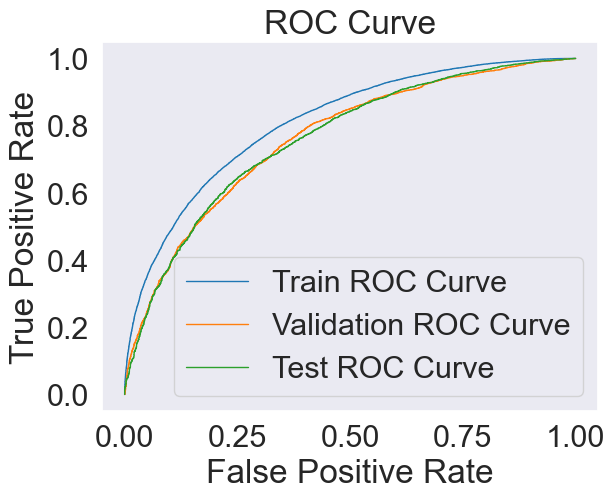

,exp_name,description,Train Time (sec),Test Time (sec),Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score
0,Model-1 Baseline LR,Logistic regression with undersampled data 124...,2.4318,0.0880,0.7738,0.7638,0.7748,0.7539,0.7407,0.7462,0.3612,0.3272,0.3588
1,Model-2 KNN,KNN with undersampled data-2 124 features,0.2857,2.8018,0.6950,0.6155,0.6184,0.7625,0.6571,0.6550,0.6992,0.6205,0.6226
2,Model-3 Decision Tree,Decision tree with undersampled data-2 124 fea...,1.3998,0.0388,0.6749,0.6535,0.6591,0.7380,0.7105,0.7129,0.6881,0.6678,0.6730
3,Model-4 Random Forest,Random Forest with undersampled data-2 124 fea...,17.3296,0.4940,0.7664,0.6654,0.6661,0.8504,0.7243,0.7273,0.7673,0.6631,0.6640
4,Model-5 Bagging Meta Estimator,Bagging Meta Estimator with undersampled data-...,8.2380,0.2080,0.9844,0.6477,0.6446,0.9990,0.6978,0.6983,0.9842,0.6210,0.6164
5,Model-7 XGBoost,XGBoost SAMME with undersampled data-2 124 fea...,5.6233,0.0837,0.7298,0.6929,0.6945,0.8102,0.7616,0.7610,0.7290,0.6922,0.6931


In [48]:
np.random.seed(42)

# creating pipeline by joining numerical and categorical pipelines
data_prep_pipeline, selected_features = get_pipeline()

# Attaching XGBoost model to the above pipeline
xgboost_full_pipeline_with_predictor = Pipeline([
    ("preparation", data_prep_pipeline),
    ("xgboost", XGBClassifier(random_state=42, 
                objective='binary:logistic', max_depth=5, eta=0.001, 
                learning_rate=0.01, colsample_bytree=0.7, n_estimators=1000))
])

# Training the model
start = time.time()
model = xgboost_full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time.time() - start, 4)

start = time.time()
score_test  = xgboost_full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time.time() - start, 4)

# Results
exp_name = f"Model-8 XGBoost  "
experiment_description =f"XGBoost SAMME with undersampled data-2 {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog


# Model Training and Validation
model.fit(X_train, y_train)

# Model Predictions
train_preds = model.predict_proba(X_train)[:, 1]
valid_preds = model.predict_proba(X_valid)[:, 1]
test_preds = model.predict_proba(X_test)[:, 1]

# Compute Metrics
train_fpr, train_tpr, _ = roc_curve(y_train, train_preds)
valid_fpr, valid_tpr, _ = roc_curve(y_valid, valid_preds)
test_fpr, test_tpr, _ = roc_curve(y_test, test_preds)
# Plot ROC Curve
plt.plot(train_fpr, train_tpr, label="Train ROC Curve")
plt.plot(valid_fpr, valid_tpr, label="Validation ROC Curve")
plt.plot(test_fpr, test_tpr, label="Test ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
expLog

## Model 9 - CatBoost

Total Features: 124 - Numerical: 107, Categorical: 16


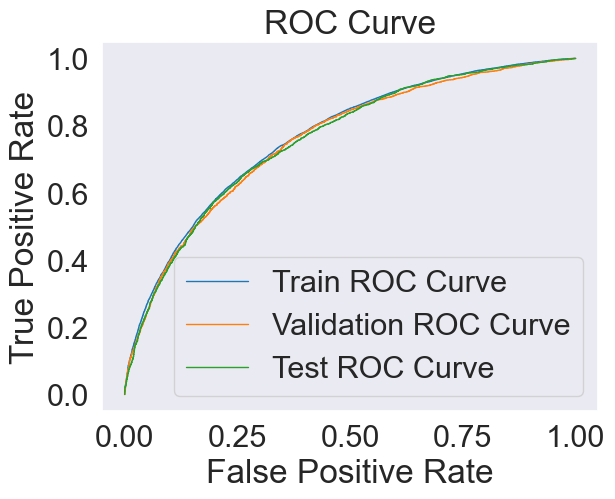

,exp_name,description,Train Time (sec),Test Time (sec),Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score
0,Model-1 Baseline LR,Logistic regression with undersampled data 124...,2.4318,0.0880,0.7738,0.7638,0.7748,0.7539,0.7407,0.7462,0.3612,0.3272,0.3588
1,Model-2 KNN,KNN with undersampled data-2 124 features,0.2857,2.8018,0.6950,0.6155,0.6184,0.7625,0.6571,0.6550,0.6992,0.6205,0.6226
2,Model-3 Decision Tree,Decision tree with undersampled data-2 124 fea...,1.3998,0.0388,0.6749,0.6535,0.6591,0.7380,0.7105,0.7129,0.6881,0.6678,0.6730
3,Model-4 Random Forest,Random Forest with undersampled data-2 124 fea...,17.3296,0.4940,0.7664,0.6654,0.6661,0.8504,0.7243,0.7273,0.7673,0.6631,0.6640
4,Model-5 Bagging Meta Estimator,Bagging Meta Estimator with undersampled data-...,8.2380,0.2080,0.9844,0.6477,0.6446,0.9990,0.6978,0.6983,0.9842,0.6210,0.6164
5,Model-7 XGBoost,XGBoost SAMME with undersampled data-2 124 fea...,5.6233,0.0837,0.7298,0.6929,0.6945,0.8102,0.7616,0.7610,0.7290,0.6922,0.6931
6,Model-12 CATBoost,CATBoost with undersampled data-2 124 features,10.1684,0.4436,0.6964,0.6904,0.6926,0.7671,0.7580,0.7591,0.6954,0.6901,0.6906
7,Model-12 CATBoost,CATBoost with undersampled data-2 124 features,13.1720,0.4564,0.6964,0.6904,0.6926,0.7671,0.7580,0.7591,0.6954,0.6901,0.6906


In [51]:
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
import numpy as np
import time

np.random.seed(42)

# creating pipeline by joining numerical and categorical pipelines
data_prep_pipeline, selected_features = get_pipeline()

# Attaching CatBoost model to the above pipeline
catboost_full_pipeline_with_predictor = Pipeline([
    ("preparation", data_prep_pipeline),
    ("catboost", CatBoostClassifier(random_state=42, iterations=1000, learning_rate=0.01,
                                    depth=5, thread_count=-1, verbose=False))
])

# Training the model
start = time.time()
model = catboost_full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time.time() - start, 4)

start = time.time()
score_test = catboost_full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time.time() - start, 4)

# Results
exp_name = f"Model-9 CATBoost  "
experiment_description =f"CATBoost with undersampled data-2 {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog
# Model Training and Validation
model.fit(X_train, y_train)

# Model Predictions
train_preds = model.predict_proba(X_train)[:, 1]
valid_preds = model.predict_proba(X_valid)[:, 1]
test_preds = model.predict_proba(X_test)[:, 1]

# Compute Metrics
train_fpr, train_tpr, _ = roc_curve(y_train, train_preds)
valid_fpr, valid_tpr, _ = roc_curve(y_valid, valid_preds)
test_fpr, test_tpr, _ = roc_curve(y_test, test_preds)
# Plot ROC Curve
plt.plot(train_fpr, train_tpr, label="Train ROC Curve")
plt.plot(valid_fpr, valid_tpr, label="Validation ROC Curve")
plt.plot(test_fpr, test_tpr, label="Test ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
expLog

# Selecting 3 best Experimental Models , hyper parameter tuning , and ensemble learner 

## HYPERPARMETER TUNING AND FEATURE SELECTION

### XGBOOST Hyper paramter Tuning and feature selection 

In [56]:
results = pd.DataFrame(columns=["ExpID", "Cross-fold Train Accuracy", "Test Accuracy", "p-value", "Train Time(s)", "Test Time(s)", "Experiment Description"])
features_dict = dict()

# A Function to execute the grid search and record the results.
def ConductGridSearch(X_train, y_train, X_test, y_test):
    # classifier for our grid search experiment
    classifiers = [
#         ('DecisionTrees', DecisionTreeClassifier(random_state=42))
        ('XGBoost', XGBClassifier(random_state=42))
    ]
    
    # grid search parameters for the classifier
    param_grid = {

       'XGBoost':  {
            'max_depth': [5,9], # Lower helps with overfitting
            'n_estimators':[800, 1000],
            'learning_rate': [0.001, 0.01],
            'eta' : [0.001, 0.01],
            'colsample_bytree' : [0.5, 0.7], 
        }
    }
    
#         # grid search parameters for the classifier
#     param_grid = {

#        'XGBoost':  {
#             'max_depth': [5], # Lower helps with overfitting
#             'n_estimators':[20],
#             'learning_rate': [ 0.1],
#             'eta' : [0.1],
#             'colsample_bytree' : [0.5], 
#         }
#     }
    
    for (name, classifier) in classifiers:
        
        print('****** STARTING TUNING', name,'*****')
        parameters = param_grid[name]
        print("Parameters:")
        for p in sorted(parameters.keys()):
            print("\t"+str(p)+": "+ str(parameters[p]))
        
        # generate the pipeline
        full_pipeline_with_predictor = Pipeline([
            ("preparation", FeatureUnion(transformer_list=[("num_pipeline", numerical_pipeline)])),
            ("predictor", classifier)
        ])
        
        
        # Execute the grid search
        params = {}
        for p in parameters.keys():
            pipe_key = 'predictor__'+str(p)
            params[pipe_key] = parameters[p] 
        
        grid_search = GridSearchCV(full_pipeline_with_predictor, params, scoring='accuracy', cv=2, 
                                   n_jobs=-1, verbose=1)
        grid_search.fit(X_train, y_train)


        # Best estimator training time
        start = time.time()
        grid_search.best_estimator_.fit(X_train, y_train)
        train_time = round(time.time() - start, 4)
        
        # Training accuracy
        cvSplits = ShuffleSplit(n_splits=3, test_size=0.7, random_state=42)
        best_train_scores = cross_val_score(full_pipeline_with_predictor,X_train , y_train, cv=cvSplits)
        best_train_accuracy = pct(best_train_scores.mean())
        
        # Best estimator prediction time and test accuracy
        start = time.time()
        best_test_accuracy = pct(grid_search.best_estimator_.score(X_test, y_test))
        test_time = round(time.time() - start, 4)
        
        
        # Importance of features
        features = numerical_features[:]
        print('\nTotal number of features:', len(features))
        importances = grid_search.best_estimator_.named_steps["predictor"].feature_importances_
        
        # selecting features based on importance values
        new_indices = [idx for idx, x in enumerate(importances) if x>0.01]
        new_importances = [x for idx, x in enumerate(importances) if x>0.01]
        new_features = [features[i] for i in new_indices]
        
        print('Total number of selected features:', len(new_features))


        
       # Plotting a barplot to visualize feature importance
        sns.set(style='whitegrid')
        plt.figure(figsize=(10, 6))
        sns.barplot(x=importances, y=features, color='red')
        plt.title('Feature Importances')
        plt.xlabel('Relative Importance')
        plt.ylabel('Feature')
        plt.show()

       
        # Conduct t-test with baseline logit and best estimator
        (t_stat, p_value) = stats.ttest_rel(logit_scores, best_train_scores)
        
        # Best parameters found using grid search
        print(f"Best Parameters for {name}:")
        best_parameters = grid_search.best_estimator_.get_params()
        best_params = []
        for param_name in sorted(params.keys()):
            best_params.append((param_name, best_parameters[param_name]))
            print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
        print("****** FINISHED TUNING",name," *****")
        
        # Results
        results.loc[len(results)] = [name, best_train_accuracy, best_test_accuracy, round(p_value,5), train_time, test_time, json.dumps(best_params)]
        
        # Storing the importances of the features
        features_dict['features'] = features
        features_dict['importances'] = importances
        

****** STARTING TUNING XGBoost *****
Parameters:
	colsample_bytree: [0.5, 0.7]
	eta: [0.001, 0.01]
	learning_rate: [0.001, 0.01]
	max_depth: [5, 9]
	n_estimators: [800, 1000]
Fitting 2 folds for each of 32 candidates, totalling 64 fits

Total number of features: 107
Total number of selected features: 25


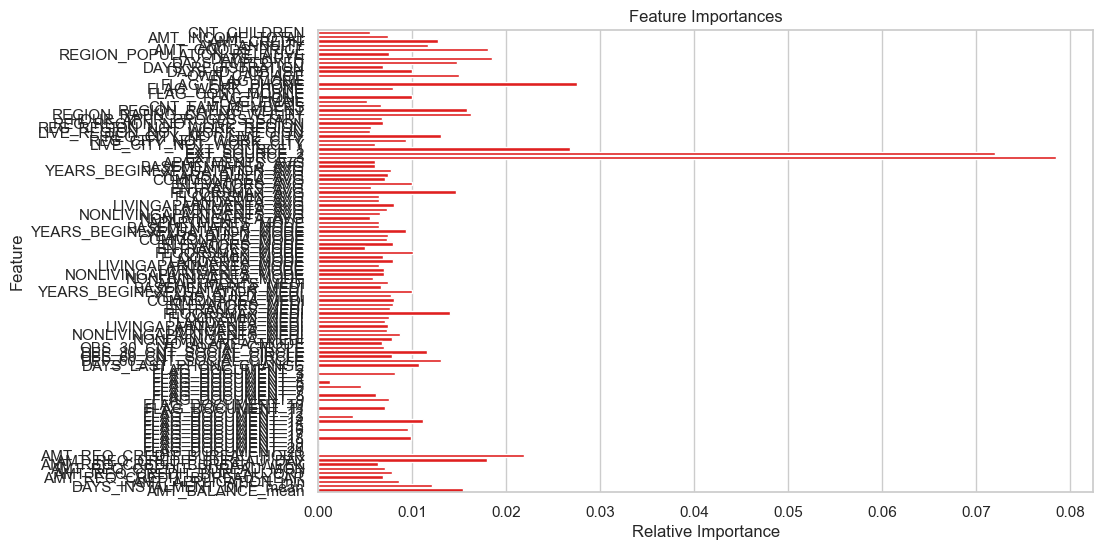

Best Parameters for XGBoost:
	predictor__colsample_bytree: 0.7
	predictor__eta: 0.001
	predictor__learning_rate: 0.01
	predictor__max_depth: 5
	predictor__n_estimators: 800
****** FINISHED TUNING XGBoost  *****


In [57]:
ConductGridSearch(X_train[numerical_features], y_train, X_test[numerical_features], y_test)

In [58]:
results

,ExpID,Cross-fold Train Accuracy,Test Accuracy,p-value,Train Time(s),Test Time(s),Experiment Description
0,XGBoost,65.69,68.915,0.00314,5.2173,0.0878,"[[""predictor__colsample_bytree"", 0.7], [""predi..."


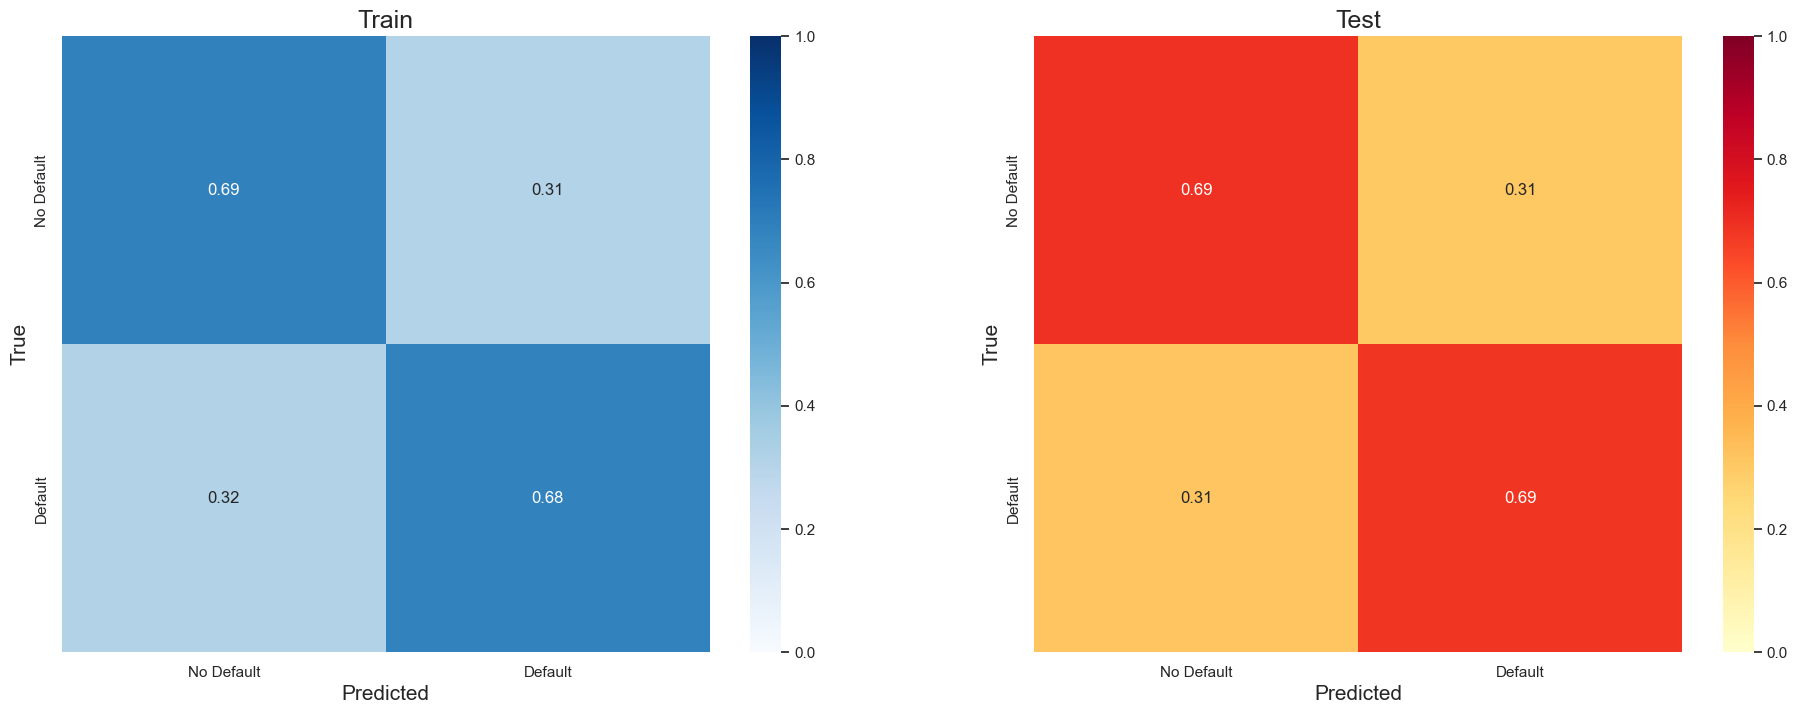

In [59]:
cm_train,cm_test=confusion_matrix_normalized(model,X_train,y_train,X_test,y_test)
fig, axes = plt.subplots(1, 2, figsize=(23, 8))

# Plot the first heatmap in the first subplot
sns.heatmap(cm_train, vmin=0, vmax=1, annot=True, cmap="Blues", ax=axes[0])
axes[0].set_xlabel("Predicted", fontsize=15)
axes[0].set_ylabel("True", fontsize=15)
axes[0].set_xticklabels(class_labels)
axes[0].set_yticklabels(class_labels)
axes[0].set_title("Train", fontsize=18)

# Plot the second heatmap in the second subplot
sns.heatmap(cm_test, vmin=0, vmax=1, annot=True, cmap="YlOrRd", ax=axes[1])
axes[1].set_xlabel("Predicted", fontsize=15)
axes[1].set_ylabel("True", fontsize=15)
axes[1].set_xticklabels(class_labels)
axes[1].set_yticklabels(class_labels)
axes[1].set_title("Test", fontsize=18)

plt.show()


F1 Score:  0.6899715279974692


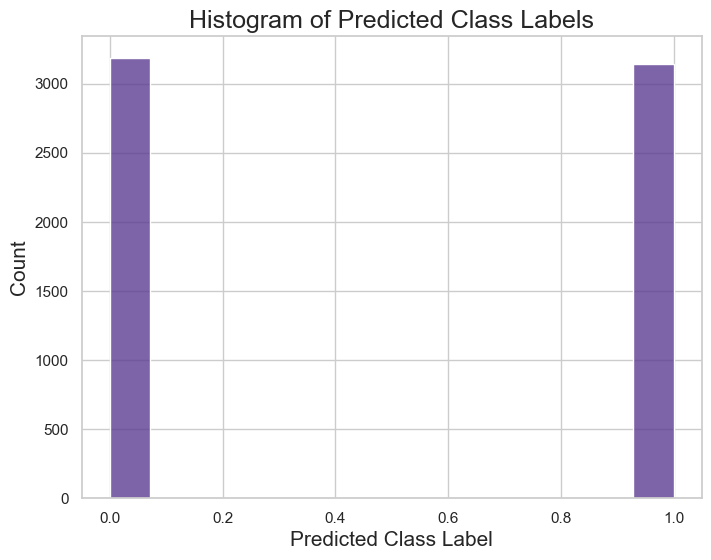

In [60]:
pred = model.predict(X_test)
# Create histogram of predicted class labels with a new color scheme
plt.figure(figsize=(8, 6))
sns.histplot(pred, kde=False, color="#5C3C92", alpha=0.8)
plt.xlabel("Predicted Class Label", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Histogram of Predicted Class Labels", fontsize=18)
f1 = f1_score(y_test, pred)
print("F1 Score: ", f1)

In [61]:
with open('features_dict_XG.pickle', 'wb') as handle:
    pickle.dump(features_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [62]:
with open('features_dict_XG.pickle', 'rb') as handle:
    x = pickle.load(handle)

I am currently performing feature selection and ruuninng model   by filtering features based on their importance values. I have used three different thresholds for feature importance: x>0, x>0.01, and x>0.005. By using these thresholds, I am trying to understand the impact of including only the most relevant features in my model.

Here's a brief explanation of each threshold:

#### x>0: 
This threshold includes all features with a non-zero importance value. It means I am considering all the features that have any impact on the model's prediction. 

##### x>0.01:
This threshold is more stringent, as I am only considering features with importance values greater than 0.01. This filter results in a smaller number of features , which may help reduce the complexity of the model and the risk of overfitting.

#### x>0.005:
This threshold is more stringentThis threshold lies between the other two. By using this threshold, I am considering features with importance values greater than 0.005. This results in a slightly larger number of features compared to the x>0.01 threshold.

The goal of using these different thresholds is to find the optimal balance between model complexity and predictive performance. By comparing the results of the models trained with different feature sets, I can identify the best trade-off between model simplicity and performance.

#### Model 10 - XGBOOST -Feature &hyperParameter Tuning x>0

In [63]:
features = features_dict['features']
importances = features_dict['importances']

new_indices = [idx for idx, x in enumerate(importances) if x>0]
new_importances = [x for idx, x in enumerate(importances) if x>0]

new_features = [features[i] for i in new_indices]
print(len(new_features))

num_attribs = new_features

np.random.seed(42)

# creating pipeline by joining numerical and categorical pipelines
data_prep_pipeline, selected_features = get_pipeline(num_attribs)

# Attaching XGBoost model to the above pipeline
xgboost_full_pipeline_with_predictor = Pipeline([
    ("preparation", data_prep_pipeline),
    ("xgboost", XGBClassifier(random_state=42, 
                objective='binary:logistic', max_depth=5, eta=0.001, 
                learning_rate=0.01, colsample_bytree=0.5, n_estimators=1000))
])

# Training the model
start = time.time()
model = xgboost_full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time.time() - start, 4)

start = time.time()
score_test  = xgboost_full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time.time() - start, 4)

# Results
exp_name = f"Model 10 - XGBOOST -Feature &hyperParameter Tuning"
experiment_description =f"XGBOOST Tuned with x>0 {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog


95
Total Features: 112 - Numerical: 95, Categorical: 16


,exp_name,description,Train Time (sec),Test Time (sec),Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score
0,Model-1 Baseline LR,Logistic regression with undersampled data 124...,2.4318,0.0880,0.7738,0.7638,0.7748,0.7539,0.7407,0.7462,0.3612,0.3272,0.3588
1,Model-2 KNN,KNN with undersampled data-2 124 features,0.2857,2.8018,0.6950,0.6155,0.6184,0.7625,0.6571,0.6550,0.6992,0.6205,0.6226
2,Model-3 Decision Tree,Decision tree with undersampled data-2 124 fea...,1.3998,0.0388,0.6749,0.6535,0.6591,0.7380,0.7105,0.7129,0.6881,0.6678,0.6730
3,Model-4 Random Forest,Random Forest with undersampled data-2 124 fea...,17.3296,0.4940,0.7664,0.6654,0.6661,0.8504,0.7243,0.7273,0.7673,0.6631,0.6640
4,Model-5 Bagging Meta Estimator,Bagging Meta Estimator with undersampled data-...,8.2380,0.2080,0.9844,0.6477,0.6446,0.9990,0.6978,0.6983,0.9842,0.6210,0.6164
5,Model-7 XGBoost,XGBoost SAMME with undersampled data-2 124 fea...,5.6233,0.0837,0.7298,0.6929,0.6945,0.8102,0.7616,0.7610,0.7290,0.6922,0.6931
6,Model-12 CATBoost,CATBoost with undersampled data-2 124 features,10.1684,0.4436,0.6964,0.6904,0.6926,0.7671,0.7580,0.7591,0.6954,0.6901,0.6906
7,Model-12 CATBoost,CATBoost with undersampled data-2 124 features,13.1720,0.4564,0.6964,0.6904,0.6926,0.7671,0.7580,0.7591,0.6954,0.6901,0.6906
8,Model-2 Baseline LR,Logistic regression with undersampled data-2 1...,2.0058,0.0532,0.6876,0.6843,0.6904,0.7525,0.7489,0.7535,0.6865,0.6854,0.6900
9,Model 10 - XGBOOST -Feature &hyperParameter Tu...,XGBOOST Tuned with x>0 112 features,11.4474,0.0992,0.7298,0.6951,0.6966,0.8091,0.7619,0.7624,0.7289,0.6947,0.6952


#### Model 11 - XGBOOST -Feature & hyperParameter Tuning x>0.01

In [64]:
features = features_dict['features']
importances = features_dict['importances']

new_indices = [idx for idx, x in enumerate(importances) if x>0.01]
new_importances = [x for idx, x in enumerate(importances) if x>0.01]

print(len(new_features))

num_attribs = new_features

np.random.seed(42)

# creating pipeline by joining numerical and categorical pipelines
data_prep_pipeline, selected_features = get_pipeline(num_attribs)

# Attaching XGBoost model to the above pipeline
xgboost_full_pipeline_with_predictor = Pipeline([
    ("preparation", data_prep_pipeline),
    ("xgboost", XGBClassifier(random_state=42, 
                objective='binary:logistic', max_depth=5, eta=0.001, 
                learning_rate=0.01, colsample_bytree=0.5, n_estimators=1000))
])

# Training the model
start = time.time()
model = xgboost_full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time.time() - start, 4)

start = time.time()
score_test  = xgboost_full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time.time() - start, 4)

# Results
# Results
exp_name = f"Model 11 - XGBOOST -Feature &hyperParameter Tuning"
experiment_description =f"XGBOOST Tuned with x>0.01 {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog


95
Total Features: 112 - Numerical: 95, Categorical: 16


,exp_name,description,Train Time (sec),Test Time (sec),Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score
0,Model-1 Baseline LR,Logistic regression with undersampled data 124...,2.4318,0.0880,0.7738,0.7638,0.7748,0.7539,0.7407,0.7462,0.3612,0.3272,0.3588
1,Model-2 KNN,KNN with undersampled data-2 124 features,0.2857,2.8018,0.6950,0.6155,0.6184,0.7625,0.6571,0.6550,0.6992,0.6205,0.6226
2,Model-3 Decision Tree,Decision tree with undersampled data-2 124 fea...,1.3998,0.0388,0.6749,0.6535,0.6591,0.7380,0.7105,0.7129,0.6881,0.6678,0.6730
3,Model-4 Random Forest,Random Forest with undersampled data-2 124 fea...,17.3296,0.4940,0.7664,0.6654,0.6661,0.8504,0.7243,0.7273,0.7673,0.6631,0.6640
4,Model-5 Bagging Meta Estimator,Bagging Meta Estimator with undersampled data-...,8.2380,0.2080,0.9844,0.6477,0.6446,0.9990,0.6978,0.6983,0.9842,0.6210,0.6164
5,Model-7 XGBoost,XGBoost SAMME with undersampled data-2 124 fea...,5.6233,0.0837,0.7298,0.6929,0.6945,0.8102,0.7616,0.7610,0.7290,0.6922,0.6931
6,Model-12 CATBoost,CATBoost with undersampled data-2 124 features,10.1684,0.4436,0.6964,0.6904,0.6926,0.7671,0.7580,0.7591,0.6954,0.6901,0.6906
7,Model-12 CATBoost,CATBoost with undersampled data-2 124 features,13.1720,0.4564,0.6964,0.6904,0.6926,0.7671,0.7580,0.7591,0.6954,0.6901,0.6906
8,Model-2 Baseline LR,Logistic regression with undersampled data-2 1...,2.0058,0.0532,0.6876,0.6843,0.6904,0.7525,0.7489,0.7535,0.6865,0.6854,0.6900
9,Model 10 - XGBOOST -Feature &hyperParameter Tu...,XGBOOST Tuned with x>0 112 features,11.4474,0.0992,0.7298,0.6951,0.6966,0.8091,0.7619,0.7624,0.7289,0.6947,0.6952


#### Model 12 - XGBOOST -Feature &hyperParameter Tuning x>0.005

In [65]:
features = features_dict['features']
importances = features_dict['importances']

new_indices = [idx for idx, x in enumerate(importances) if x>0.005]
new_importances = [x for idx, x in enumerate(importances) if x>0.005]

new_features = [features[i] for i in new_indices]
print(len(new_features))

num_attribs = new_features

np.random.seed(42)

# creating pipeline by joining numerical and categorical pipelines
data_prep_pipeline, selected_features = get_pipeline(num_attribs)

# Attaching XGBoost model to the above pipeline
xgboost_full_pipeline_with_predictor = Pipeline([
    ("preparation", data_prep_pipeline),
    ("xgboost", XGBClassifier(random_state=42, 
                objective='binary:logistic', max_depth=5, eta=0.001, 
                learning_rate=0.01, colsample_bytree=0.7, n_estimators=1000))
])

# Training the model
start = time.time()
model = xgboost_full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time.time() - start, 4)

start = time.time()
score_test  = xgboost_full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time.time() - start, 4)

# Results
# Results
exp_name = f"Model 12 - XGBOOST -Feature &hyperParameter Tuning"
experiment_description =f"XGBOOST Tuned with x>0.005 {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog



92
Total Features: 109 - Numerical: 92, Categorical: 16


,exp_name,description,Train Time (sec),Test Time (sec),Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score
0,Model-1 Baseline LR,Logistic regression with undersampled data 124...,2.4318,0.0880,0.7738,0.7638,0.7748,0.7539,0.7407,0.7462,0.3612,0.3272,0.3588
1,Model-2 KNN,KNN with undersampled data-2 124 features,0.2857,2.8018,0.6950,0.6155,0.6184,0.7625,0.6571,0.6550,0.6992,0.6205,0.6226
2,Model-3 Decision Tree,Decision tree with undersampled data-2 124 fea...,1.3998,0.0388,0.6749,0.6535,0.6591,0.7380,0.7105,0.7129,0.6881,0.6678,0.6730
3,Model-4 Random Forest,Random Forest with undersampled data-2 124 fea...,17.3296,0.4940,0.7664,0.6654,0.6661,0.8504,0.7243,0.7273,0.7673,0.6631,0.6640
4,Model-5 Bagging Meta Estimator,Bagging Meta Estimator with undersampled data-...,8.2380,0.2080,0.9844,0.6477,0.6446,0.9990,0.6978,0.6983,0.9842,0.6210,0.6164
5,Model-7 XGBoost,XGBoost SAMME with undersampled data-2 124 fea...,5.6233,0.0837,0.7298,0.6929,0.6945,0.8102,0.7616,0.7610,0.7290,0.6922,0.6931
6,Model-12 CATBoost,CATBoost with undersampled data-2 124 features,10.1684,0.4436,0.6964,0.6904,0.6926,0.7671,0.7580,0.7591,0.6954,0.6901,0.6906
7,Model-12 CATBoost,CATBoost with undersampled data-2 124 features,13.1720,0.4564,0.6964,0.6904,0.6926,0.7671,0.7580,0.7591,0.6954,0.6901,0.6906
8,Model-2 Baseline LR,Logistic regression with undersampled data-2 1...,2.0058,0.0532,0.6876,0.6843,0.6904,0.7525,0.7489,0.7535,0.6865,0.6854,0.6900
9,Model 10 - XGBOOST -Feature &hyperParameter Tu...,XGBOOST Tuned with x>0 112 features,11.4474,0.0992,0.7298,0.6951,0.6966,0.8091,0.7619,0.7624,0.7289,0.6947,0.6952


### CatBoost Hyper Parameter Tuning and Feature Selection 

In [66]:
import time
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import GridSearchCV, ShuffleSplit, cross_val_score
from sklearn.pipeline import Pipeline, FeatureUnion
from catboost import CatBoostClassifier

# Helper function to convert decimal to percentage
def pct(decimal):
    return round(decimal * 100, 2)

results = pd.DataFrame(columns=["ExpID", "Cross-fold Train Accuracy", "Test Accuracy", "p-value", "Train Time(s)", "Test Time(s)", "Experiment Description"])
features_dict = dict()

# A Function to execute the grid search and record the results.
def ConductGridSearch(X_train, y_train, X_test, y_test):
    # classifier for our grid search experiment
    classifiers = [
        ('CatBoost', CatBoostClassifier(random_state=42, verbose=False))
    ]
    
    # grid search parameters for the classifier
    param_grid = {
       'CatBoost':  {
            'depth': [5, 9],
            'iterations': [800, 1000],
            'learning_rate': [0.001, 0.01],
            'colsample_bylevel': [0.5, 0.7], 
        }
    }
    
#       # grid search parameters for the classifier
#     param_grid = {
#        'CatBoost':  {
#             'depth': [5],
#             'iterations': [20],
#             'learning_rate': [ 0.01],
#             'colsample_bylevel': [0.5], 
#         }
#     }
    
    for (name, classifier) in classifiers:
        
        #name = "example"
        print(f"****** STARTING {name.upper()} *****")
       
        parameters = param_grid[name]
        print("Parameters:")
        for p in sorted(parameters.keys()):
            print("\t"+str(p)+": "+ str(parameters[p]))
        
        # generate the pipeline
        full_pipeline_with_predictor = Pipeline([
            ("preparation", FeatureUnion(transformer_list=[("num_pipeline", numerical_pipeline)])),
            ("predictor", classifier)
        ])
        
        
        # Execute the grid search
        params = {}
        for p in parameters.keys():
            pipe_key = 'predictor__'+str(p)
            params[pipe_key] = parameters[p] 
        
        grid_search = GridSearchCV(full_pipeline_with_predictor, params, scoring='accuracy', cv=2, 
                                   n_jobs=-1, verbose=1)
        grid_search.fit(X_train, y_train)


        # Best estimator training time
        start = time.time()
        grid_search.best_estimator_.fit(X_train, y_train)
        train_time = round(time.time() - start, 4)
        
        # Training accuracy
        cvSplits = ShuffleSplit(n_splits=3, test_size=0.7, random_state=42)
        best_train_scores = cross_val_score(full_pipeline_with_predictor,X_train , y_train, cv=cvSplits)
        best_train_accuracy = pct(best_train_scores.mean())
        
        # Best estimator prediction time and test accuracy
        start = time.time()
        best_test_accuracy = pct(grid_search.best_estimator_.score(X_test, y_test))
        test_time = round(time.time() - start, 4)
        
        
        # Importance of features
        features = numerical_features[:]
        print('\nTotal number of features:', len(features))
        importances = grid_search.best_estimator_.named_steps["predictor"].feature_importances_
        
        # selecting features based on importance values
        new_indices = [idx for idx, x in enumerate(importances) if x>0.01]
        new_importances = [x for idx, x in enumerate(importances) if x>0.01]
        new_features = [features[i] for i in new_indices]
        
        print('Total number of selected features:', len(new_features))

        # Plotting a barplot to visualize feature importance
        sns.set(style='whitegrid')
        plt.figure(figsize=(10, 6))
        sns.barplot(x=importances, y=features, color='red')
        plt.title('Feature Importances')
        plt.xlabel('Relative Importance')
        plt.ylabel('Feature')
        plt.show()


        # Conduct t-test with baseline logit and best estimator
        (t_stat, p_value) = stats.ttest_rel(logit_scores, best_train_scores)

        # Best parameters found using grid search
        print(f"Best Parameters for {name}:")
        best_parameters = grid_search.best_estimator_.get_params()
        best_params = []
        for param_name in sorted(params.keys()):
            best_params.append((param_name, best_parameters[param_name]))
            print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
        
        print(f"****** FINISHED {name.upper()} *****")

        # Results
        results.loc[len(results)] = [name, best_train_accuracy, best_test_accuracy, round(p_value,5), train_time, test_time, json.dumps(best_params)]

        # Storing the importances of the features
        features_dict['features'] = features
        features_dict['importances'] = importances



****** STARTING CATBOOST *****
Parameters:
	colsample_bylevel: [0.5, 0.7]
	depth: [5, 9]
	iterations: [800, 1000]
	learning_rate: [0.001, 0.01]
Fitting 2 folds for each of 16 candidates, totalling 32 fits

Total number of features: 107
Total number of selected features: 95


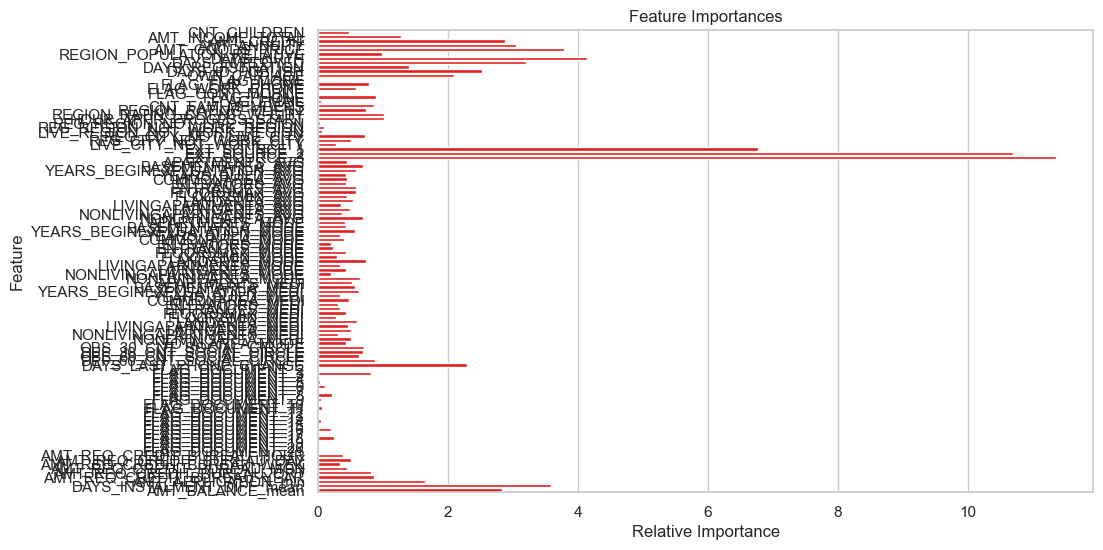

Best Parameters for CatBoost:
	predictor__colsample_bylevel: 0.5
	predictor__depth: 9
	predictor__iterations: 1000
	predictor__learning_rate: 0.01
****** FINISHED CATBOOST *****


In [67]:
ConductGridSearch(X_train[numerical_features], y_train, X_test[numerical_features], y_test)

In [68]:
results 

,ExpID,Cross-fold Train Accuracy,Test Accuracy,p-value,Train Time(s),Test Time(s),Experiment Description
0,CatBoost,68.02,68.55,0.3751,34.2201,0.0486,"[[""predictor__colsample_bylevel"", 0.5], [""pred..."


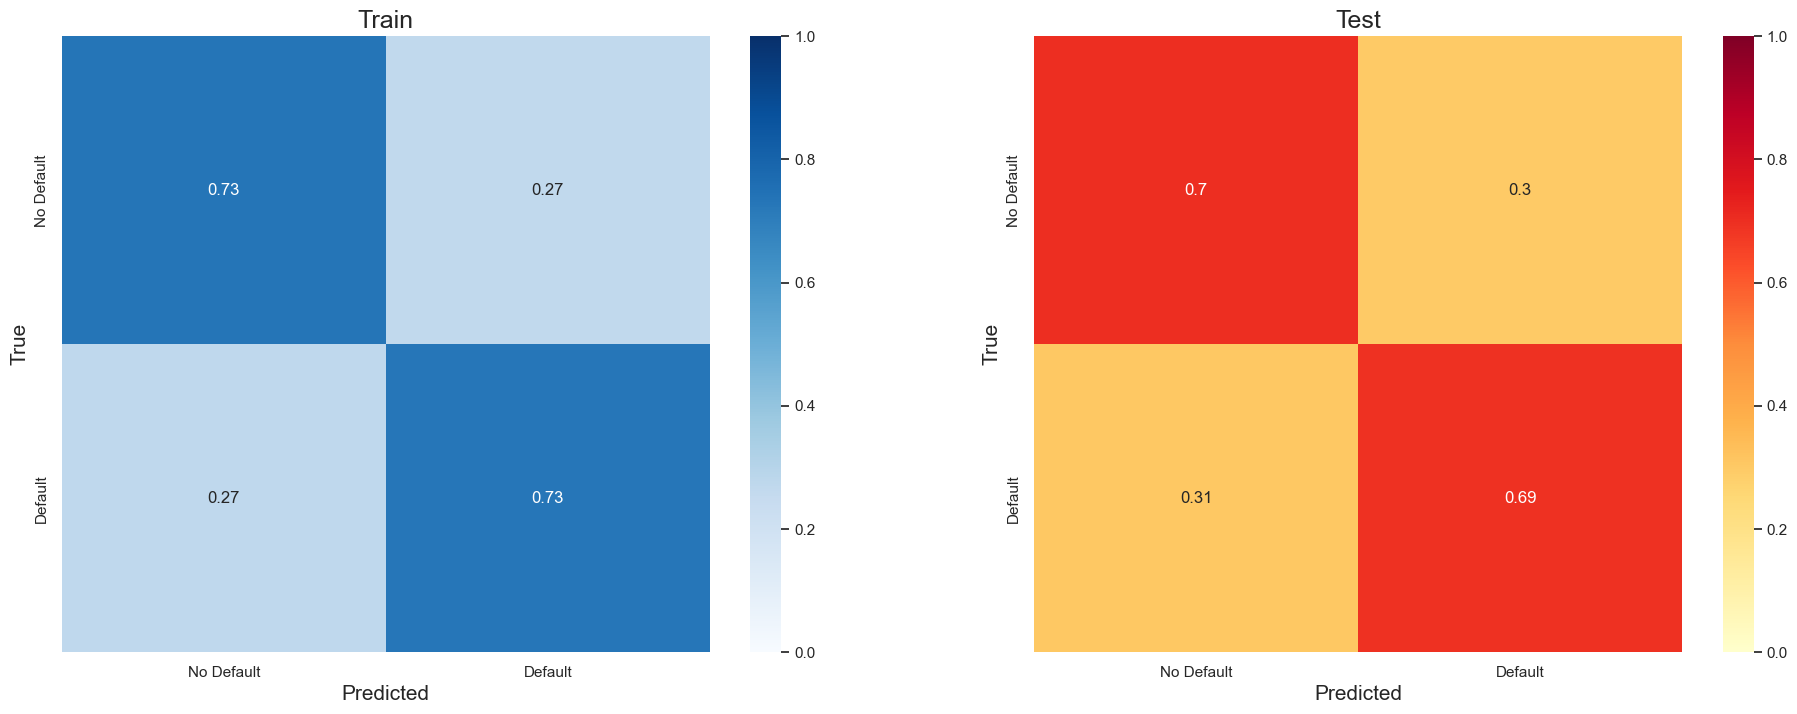

In [69]:
cm_train,cm_test=confusion_matrix_normalized(model,X_train,y_train,X_test,y_test)
fig, axes = plt.subplots(1, 2, figsize=(23, 8))

# Plot the first heatmap in the first subplot
sns.heatmap(cm_train, vmin=0, vmax=1, annot=True, cmap="Blues", ax=axes[0])
axes[0].set_xlabel("Predicted", fontsize=15)
axes[0].set_ylabel("True", fontsize=15)
axes[0].set_xticklabels(class_labels)
axes[0].set_yticklabels(class_labels)
axes[0].set_title("Train", fontsize=18)

# Plot the second heatmap in the second subplot
sns.heatmap(cm_test, vmin=0, vmax=1, annot=True, cmap="YlOrRd", ax=axes[1])
axes[1].set_xlabel("Predicted", fontsize=15)
axes[1].set_ylabel("True", fontsize=15)
axes[1].set_xticklabels(class_labels)
axes[1].set_yticklabels(class_labels)
axes[1].set_title("Test", fontsize=18)

plt.show()

F1 Score:  0.6951566951566951


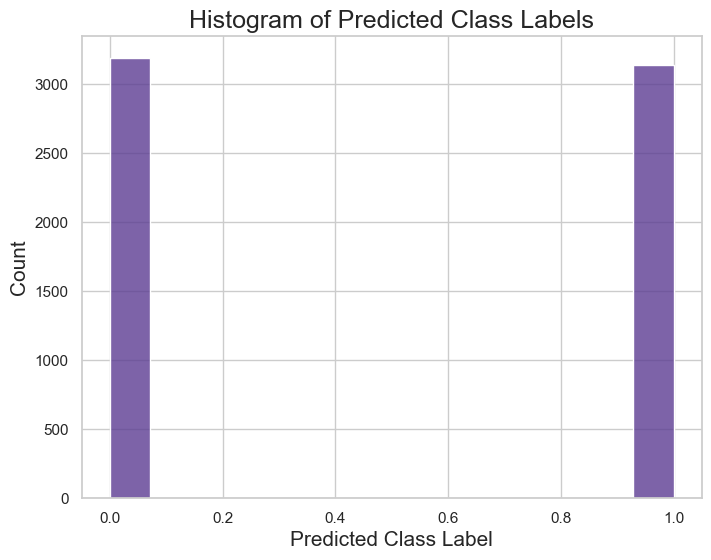

In [70]:
pred = model.predict(X_test)
# Create histogram of predicted class labels with a new color scheme
plt.figure(figsize=(8, 6))
sns.histplot(pred, kde=False, color="#5C3C92", alpha=0.8)
plt.xlabel("Predicted Class Label", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Histogram of Predicted Class Labels", fontsize=18)
f1 = f1_score(y_test, pred)
f1 = f1_score(y_test, pred)
print("F1 Score: ", f1)

In [71]:
with open('features_dict_catboost.pickle', 'wb') as handle:
    pickle.dump(features_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [72]:
with open('features_dict_catboost.pickle', 'rb') as handle:
    x = pickle.load(handle)

### Model 13 - CatBOOST -Feature &hyperParameter Tuning x>0

In [73]:
features = features_dict['features']
importances = features_dict['importances']

new_indices = [idx for idx, x in enumerate(importances) if x > 0]
new_importances = [x for idx, x in enumerate(importances) if x > 0]

new_features = [features[i] for i in new_indices]
print(len(new_features))

num_attribs = new_features

np.random.seed(42)

# creating pipeline by joining numerical and categorical pipelines
data_prep_pipeline, selected_features = get_pipeline(num_attribs)

# Attaching CatBoost model to the above pipeline
catboost_full_pipeline_with_predictor = Pipeline([
    ("preparation", data_prep_pipeline),
    ("catboost", CatBoostClassifier(random_state=42, 
                iterations=1000, learning_rate=0.01, depth=9, 
                colsample_bylevel=0.5, thread_count=-1, verbose=False))
])

# Training the model
start = time.time()
model = catboost_full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time.time() - start, 4)

start = time.time()
score_test = catboost_full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time.time() - start, 4)

# Results
exp_name = f"Model 13 - CatBOOST -Feature &hyperParameter Tuning"
experiment_description =f"CatBOOST Tuned with x>0 {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog


103
Total Features: 120 - Numerical: 103, Categorical: 16


,exp_name,description,Train Time (sec),Test Time (sec),Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score
0,Model-1 Baseline LR,Logistic regression with undersampled data 124...,2.4318,0.0880,0.7738,0.7638,0.7748,0.7539,0.7407,0.7462,0.3612,0.3272,0.3588
1,Model-2 KNN,KNN with undersampled data-2 124 features,0.2857,2.8018,0.6950,0.6155,0.6184,0.7625,0.6571,0.6550,0.6992,0.6205,0.6226
2,Model-3 Decision Tree,Decision tree with undersampled data-2 124 fea...,1.3998,0.0388,0.6749,0.6535,0.6591,0.7380,0.7105,0.7129,0.6881,0.6678,0.6730
3,Model-4 Random Forest,Random Forest with undersampled data-2 124 fea...,17.3296,0.4940,0.7664,0.6654,0.6661,0.8504,0.7243,0.7273,0.7673,0.6631,0.6640
4,Model-5 Bagging Meta Estimator,Bagging Meta Estimator with undersampled data-...,8.2380,0.2080,0.9844,0.6477,0.6446,0.9990,0.6978,0.6983,0.9842,0.6210,0.6164
5,Model-7 XGBoost,XGBoost SAMME with undersampled data-2 124 fea...,5.6233,0.0837,0.7298,0.6929,0.6945,0.8102,0.7616,0.7610,0.7290,0.6922,0.6931
6,Model-12 CATBoost,CATBoost with undersampled data-2 124 features,10.1684,0.4436,0.6964,0.6904,0.6926,0.7671,0.7580,0.7591,0.6954,0.6901,0.6906
7,Model-12 CATBoost,CATBoost with undersampled data-2 124 features,13.1720,0.4564,0.6964,0.6904,0.6926,0.7671,0.7580,0.7591,0.6954,0.6901,0.6906
8,Model-2 Baseline LR,Logistic regression with undersampled data-2 1...,2.0058,0.0532,0.6876,0.6843,0.6904,0.7525,0.7489,0.7535,0.6865,0.6854,0.6900
9,Model 10 - XGBOOST -Feature &hyperParameter Tu...,XGBOOST Tuned with x>0 112 features,11.4474,0.0992,0.7298,0.6951,0.6966,0.8091,0.7619,0.7624,0.7289,0.6947,0.6952


### Model 14 - CatBOOST -Feature & HyperParameter Tuning x>0.1

In [74]:
features = features_dict['features']
importances = features_dict['importances']

new_indices = [idx for idx, x in enumerate(importances) if x > 0.1]
new_importances = [x for idx, x in enumerate(importances) if x > 0.1]

new_features = [features[i] for i in new_indices]
print(len(new_features))

num_attribs = new_features

np.random.seed(42)

# creating pipeline by joining numerical and categorical pipelines
data_prep_pipeline, selected_features = get_pipeline(num_attribs)

# Attaching CatBoost model to the above pipeline
catboost_full_pipeline_with_predictor = Pipeline([
    ("preparation", data_prep_pipeline),
    ("catboost", CatBoostClassifier(random_state=42, 
                iterations=1000, learning_rate=0.01, depth=9, 
                colsample_bylevel=0.5, thread_count=-1, verbose=False))
])

# Training the model
start = time.time()
model = catboost_full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time.time() - start, 4)

start = time.time()
score_test = catboost_full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time.time() - start, 4)

# Results
exp_name = f"Model 14 - CatBOOST -Feature &hyperParameter Tuning"
experiment_description =f"CatBOOST Tuned with x>0.1 {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog

86
Total Features: 103 - Numerical: 86, Categorical: 16


,exp_name,description,Train Time (sec),Test Time (sec),Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score
0,Model-1 Baseline LR,Logistic regression with undersampled data 124...,2.4318,0.0880,0.7738,0.7638,0.7748,0.7539,0.7407,0.7462,0.3612,0.3272,0.3588
1,Model-2 KNN,KNN with undersampled data-2 124 features,0.2857,2.8018,0.6950,0.6155,0.6184,0.7625,0.6571,0.6550,0.6992,0.6205,0.6226
2,Model-3 Decision Tree,Decision tree with undersampled data-2 124 fea...,1.3998,0.0388,0.6749,0.6535,0.6591,0.7380,0.7105,0.7129,0.6881,0.6678,0.6730
3,Model-4 Random Forest,Random Forest with undersampled data-2 124 fea...,17.3296,0.4940,0.7664,0.6654,0.6661,0.8504,0.7243,0.7273,0.7673,0.6631,0.6640
4,Model-5 Bagging Meta Estimator,Bagging Meta Estimator with undersampled data-...,8.2380,0.2080,0.9844,0.6477,0.6446,0.9990,0.6978,0.6983,0.9842,0.6210,0.6164
5,Model-7 XGBoost,XGBoost SAMME with undersampled data-2 124 fea...,5.6233,0.0837,0.7298,0.6929,0.6945,0.8102,0.7616,0.7610,0.7290,0.6922,0.6931
6,Model-12 CATBoost,CATBoost with undersampled data-2 124 features,10.1684,0.4436,0.6964,0.6904,0.6926,0.7671,0.7580,0.7591,0.6954,0.6901,0.6906
7,Model-12 CATBoost,CATBoost with undersampled data-2 124 features,13.1720,0.4564,0.6964,0.6904,0.6926,0.7671,0.7580,0.7591,0.6954,0.6901,0.6906
8,Model-2 Baseline LR,Logistic regression with undersampled data-2 1...,2.0058,0.0532,0.6876,0.6843,0.6904,0.7525,0.7489,0.7535,0.6865,0.6854,0.6900
9,Model 10 - XGBOOST -Feature &hyperParameter Tu...,XGBOOST Tuned with x>0 112 features,11.4474,0.0992,0.7298,0.6951,0.6966,0.8091,0.7619,0.7624,0.7289,0.6947,0.6952


### Model 15 - CatBOOST -Feature &hyperParameter Tuning x>0.005

In [75]:
features = features_dict['features']
importances = features_dict['importances']

new_indices = [idx for idx, x in enumerate(importances) if x > 0.005]
new_importances = [x for idx, x in enumerate(importances) if x > 0.005]

new_features = [features[i] for i in new_indices]
print(len(new_features))

num_attribs = new_features

np.random.seed(42)

# creating pipeline by joining numerical and categorical pipelines
data_prep_pipeline, selected_features = get_pipeline(num_attribs)

# Attaching CatBoost model to the above pipeline
catboost_full_pipeline_with_predictor = Pipeline([
    ("preparation", data_prep_pipeline),
    ("catboost", CatBoostClassifier(random_state=42, 
                iterations=1000, learning_rate=0.01, depth=9, 
                colsample_bylevel=0.5, thread_count=-1, verbose=False))
])

# Training the model
start = time.time()
model = catboost_full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time.time() - start, 4)

start = time.time()
score_test = catboost_full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time.time() - start, 4)

# Results
exp_name = f"Model 15 - CatBOOST -Feature &hyperParameter Tuning"
experiment_description =f"CatBOOST Tuned with x>0.005 {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog

96
Total Features: 113 - Numerical: 96, Categorical: 16


,exp_name,description,Train Time (sec),Test Time (sec),Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score
0,Model-1 Baseline LR,Logistic regression with undersampled data 124...,2.4318,0.0880,0.7738,0.7638,0.7748,0.7539,0.7407,0.7462,0.3612,0.3272,0.3588
1,Model-2 KNN,KNN with undersampled data-2 124 features,0.2857,2.8018,0.6950,0.6155,0.6184,0.7625,0.6571,0.6550,0.6992,0.6205,0.6226
2,Model-3 Decision Tree,Decision tree with undersampled data-2 124 fea...,1.3998,0.0388,0.6749,0.6535,0.6591,0.7380,0.7105,0.7129,0.6881,0.6678,0.6730
3,Model-4 Random Forest,Random Forest with undersampled data-2 124 fea...,17.3296,0.4940,0.7664,0.6654,0.6661,0.8504,0.7243,0.7273,0.7673,0.6631,0.6640
4,Model-5 Bagging Meta Estimator,Bagging Meta Estimator with undersampled data-...,8.2380,0.2080,0.9844,0.6477,0.6446,0.9990,0.6978,0.6983,0.9842,0.6210,0.6164
5,Model-7 XGBoost,XGBoost SAMME with undersampled data-2 124 fea...,5.6233,0.0837,0.7298,0.6929,0.6945,0.8102,0.7616,0.7610,0.7290,0.6922,0.6931
6,Model-12 CATBoost,CATBoost with undersampled data-2 124 features,10.1684,0.4436,0.6964,0.6904,0.6926,0.7671,0.7580,0.7591,0.6954,0.6901,0.6906
7,Model-12 CATBoost,CATBoost with undersampled data-2 124 features,13.1720,0.4564,0.6964,0.6904,0.6926,0.7671,0.7580,0.7591,0.6954,0.6901,0.6906
8,Model-2 Baseline LR,Logistic regression with undersampled data-2 1...,2.0058,0.0532,0.6876,0.6843,0.6904,0.7525,0.7489,0.7535,0.6865,0.6854,0.6900
9,Model 10 - XGBOOST -Feature &hyperParameter Tu...,XGBOOST Tuned with x>0 112 features,11.4474,0.0992,0.7298,0.6951,0.6966,0.8091,0.7619,0.7624,0.7289,0.6947,0.6952


### Random Forest Hyper Parameter Tuning and Feature Selection 

In [76]:
from sklearn.ensemble import RandomForestClassifier

results = pd.DataFrame(columns=["ExpID", "Cross-fold Train Accuracy", "Test Accuracy", "p-value", "Train Time(s)", "Test Time(s)", "Experiment Description"])
features_dict = dict()

# A Function to execute the grid search and record the results.
def ConductGridSearch(X_train, y_train, X_test, y_test):
    # classifier for our grid search experiment
    classifiers = [
        ('RandomForest', RandomForestClassifier(random_state=42))
    ]
    
    # grid search parameters for the classifier
    param_grid = {
        'RandomForest':  {
            'n_estimators': [100, 200],
            'max_depth': [5, 10],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2],
            'max_features': ['auto', 'sqrt']
        }
    }
    
    for (name, classifier) in classifiers:
        
        print('****** START', name,'*****')
        parameters = param_grid[name]
        print("Parameters:")
        for p in sorted(parameters.keys()):
            print("\t"+str(p)+": "+ str(parameters[p]))
        
        # generate the pipeline
        full_pipeline_with_predictor = Pipeline([
            ("preparation", FeatureUnion(transformer_list=[("num_pipeline", numerical_pipeline)])),
            ("predictor", classifier)
        ])
        
        
        # Execute the grid search
        params = {}
        for p in parameters.keys():
            pipe_key = 'predictor__'+str(p)
            params[pipe_key] = parameters[p] 
        
        grid_search = GridSearchCV(full_pipeline_with_predictor, params, scoring='accuracy', cv=2, 
                                   n_jobs=-1, verbose=1)
        grid_search.fit(X_train, y_train)


        # Best estimator training time
        start = time.time()
        grid_search.best_estimator_.fit(X_train, y_train)
        train_time = round(time.time() - start, 4)
        
        # Training accuracy
        cvSplits = ShuffleSplit(n_splits=3, test_size=0.7, random_state=42)
        best_train_scores = cross_val_score(full_pipeline_with_predictor,X_train , y_train, cv=cvSplits)
        best_train_accuracy = pct(best_train_scores.mean())
        
        # Best estimator prediction time and test accuracy
        start = time.time()
        best_test_accuracy = pct(grid_search.best_estimator_.score(X_test, y_test))
        test_time = round(time.time() - start, 4)
        
        
        # Importance of features
        features = numerical_features[:]
        print('\nTotal number of features:', len(features))
        importances = grid_search.best_estimator_.named_steps["predictor"].feature_importances_
        
        # selecting features based on importance values
        new_indices = [idx for idx, x in enumerate(importances) if x>0.01]
        new_importances = [x for idx, x in enumerate(importances) if x>0.01]
        new_features = [features[i] for i in new_indices]
        
        print('Total number of selected features:', len(new_features))

        
         # Plotting a barplot to visualize feature importance
        sns.set(style='whitegrid')
        plt.figure(figsize=(10, 6))
        sns.barplot(x=importances, y=features, color='red')
        plt.title('Feature Importances')
        plt.xlabel('Relative Importance')
        plt.ylabel('Feature')
        plt.show()
       
         # Conduct t-test with baseline logit and best estimator
        (t_stat, p_value) = stats.ttest_rel(logit_scores, best_train_scores)
            # Best parameters found using grid search
        print(f"Best Parameters for {name}:")
        best_parameters = grid_search.best_estimator_.get_params()
        best_params = []
        for param_name in sorted(params.keys()):
            best_params.append((param_name, best_parameters[param_name]))
            print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
        print("****** FINISH",name," *****")

        # Results
        results.loc[len(results)] = [name, best_train_accuracy, best_test_accuracy, round(p_value,5), train_time, test_time, json.dumps(best_params)]

        # Storing the importances of the features
        features_dict['features'] = features
        features_dict['importances'] = importances

****** START RandomForest *****
Parameters:
	max_depth: [5, 10]
	max_features: ['auto', 'sqrt']
	min_samples_leaf: [1, 2]
	min_samples_split: [2, 5]
	n_estimators: [100, 200]
Fitting 2 folds for each of 32 candidates, totalling 64 fits

Total number of features: 107
Total number of selected features: 15


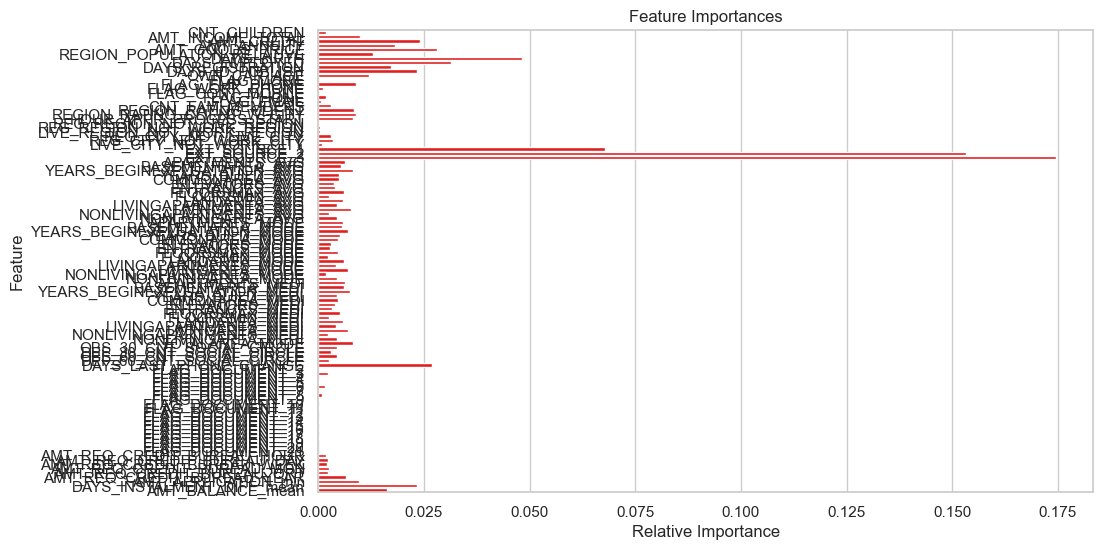

Best Parameters for RandomForest:
	predictor__max_depth: 10
	predictor__max_features: sqrt
	predictor__min_samples_leaf: 2
	predictor__min_samples_split: 5
	predictor__n_estimators: 200
****** FINISH RandomForest  *****


In [77]:
ConductGridSearch(X_train[numerical_features], y_train, X_test[numerical_features], y_test)

In [78]:
results

,ExpID,Cross-fold Train Accuracy,Test Accuracy,p-value,Train Time(s),Test Time(s),Experiment Description
0,RandomForest,66.57,67.16,0.00287,15.3889,0.2074,"[[""predictor__max_depth"", 10], [""predictor__ma..."


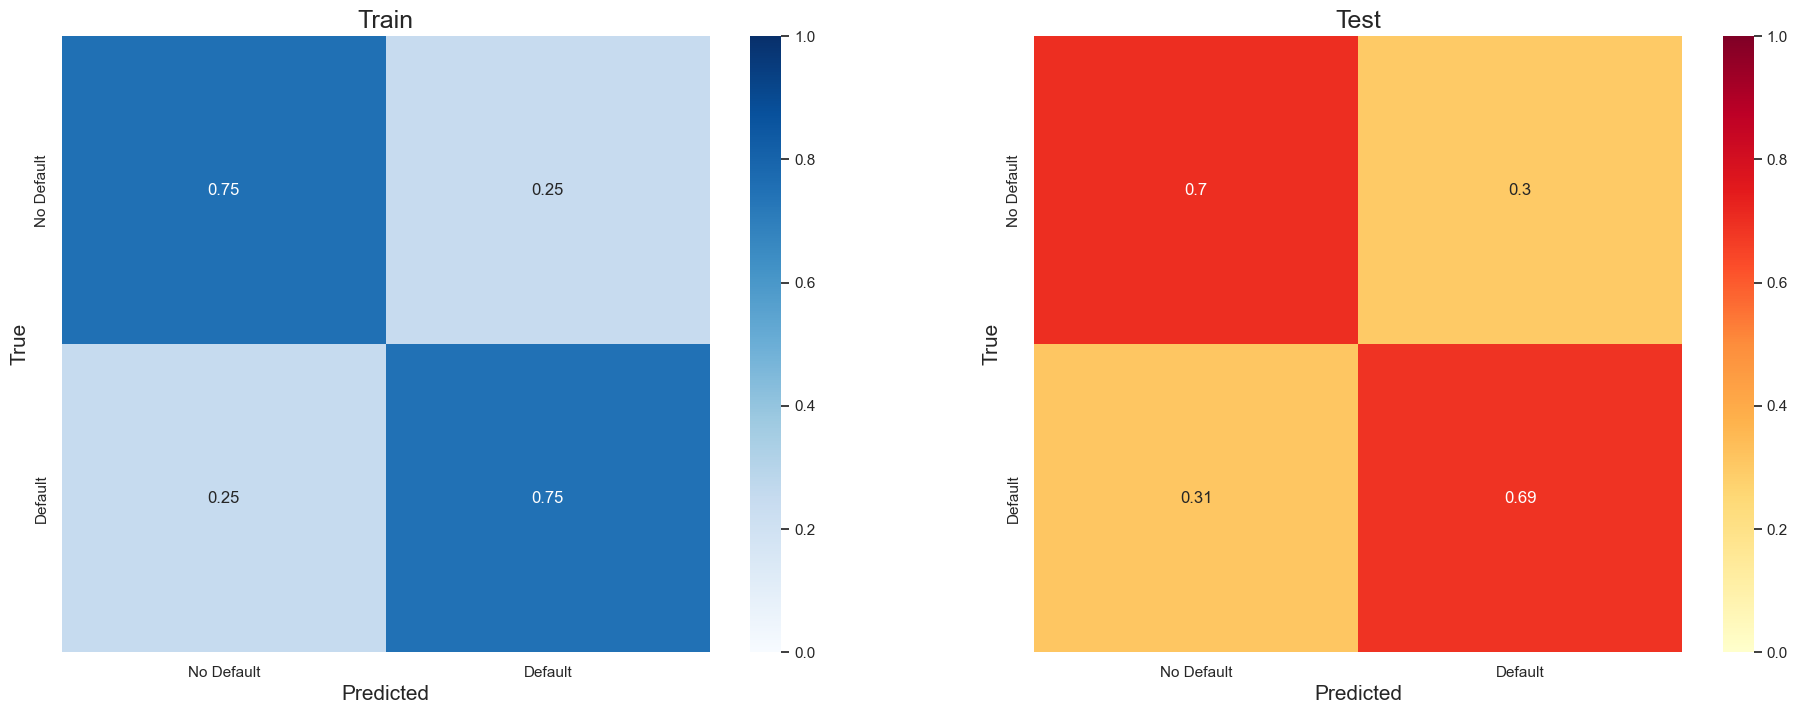

In [79]:
cm_train,cm_test=confusion_matrix_normalized(model,X_train,y_train,X_test,y_test)
fig, axes = plt.subplots(1, 2, figsize=(23, 8))

# Plot the first heatmap in the first subplot
sns.heatmap(cm_train, vmin=0, vmax=1, annot=True, cmap="Blues", ax=axes[0])
axes[0].set_xlabel("Predicted", fontsize=15)
axes[0].set_ylabel("True", fontsize=15)
axes[0].set_xticklabels(class_labels)
axes[0].set_yticklabels(class_labels)
axes[0].set_title("Train", fontsize=18)

# Plot the second heatmap in the second subplot
sns.heatmap(cm_test, vmin=0, vmax=1, annot=True, cmap="YlOrRd", ax=axes[1])
axes[1].set_xlabel("Predicted", fontsize=15)
axes[1].set_ylabel("True", fontsize=15)
axes[1].set_xticklabels(class_labels)
axes[1].set_yticklabels(class_labels)
axes[1].set_title("Test", fontsize=18)

plt.show()

F1 Score:  0.6951702296120349


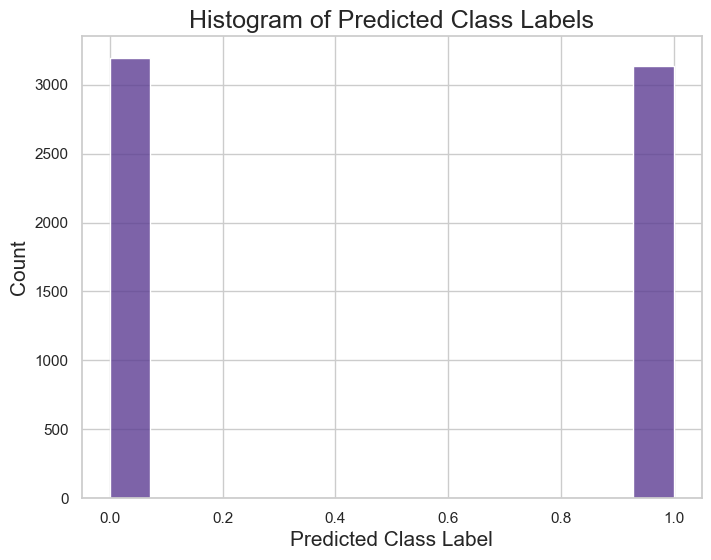

In [80]:
pred = model.predict(X_test)
# Create histogram of predicted class labels with a new color scheme
plt.figure(figsize=(8, 6))
sns.histplot(pred, kde=False, color="#5C3C92", alpha=0.8)
plt.xlabel("Predicted Class Label", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Histogram of Predicted Class Labels", fontsize=18)
f1 = f1_score(y_test, pred)
print("F1 Score: ", f1)

In [81]:
with open('features_dict_rf.pickle', 'wb') as handle:
    pickle.dump(features_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [82]:
with open('features_dict_rf.pickle', 'rb') as handle:
    x = pickle.load(handle)

### Model 16- Random Forest -Feature & hyperParameter Tuning x>0

In [86]:
features = features_dict['features']
importances = features_dict['importances']

new_indices = [idx for idx, x in enumerate(importances) if x > 0]
new_importances = [x for idx, x in enumerate(importances) if x > 0]

new_features = [features[i] for i in new_indices]
print(len(new_features))

num_attribs = new_features

np.random.seed(42)

# creating pipeline by joining numerical and categorical pipelines
data_prep_pipeline, selected_features = get_pipeline(num_attribs)

# Attaching RandomForest model to the above pipeline
random_forest_full_pipeline_with_predictor = Pipeline([
    ("preparation", data_prep_pipeline),
    ("random_forest", RandomForestClassifier(random_state=42, 
                n_estimators=200, max_depth=10, max_features='sqrt', 
                min_samples_leaf=2, min_samples_split=5, n_jobs=-1))
])

# Training the model
start = time.time()
model = random_forest_full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time.time() - start, 4)

start = time.time()
score_test = random_forest_full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time.time() - start, 4)

# Results
# Results
exp_name = f"Model 16 - Random Forest -Feature &hyperParameter Tuning"
experiment_description =f"Random Forest Tuned with x>0 {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog

99
Total Features: 116 - Numerical: 99, Categorical: 16


,exp_name,description,Train Time (sec),Test Time (sec),Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score
0,Model-1 Baseline LR,Logistic regression with undersampled data 124...,2.4318,0.0880,0.7738,0.7638,0.7748,0.7539,0.7407,0.7462,0.3612,0.3272,0.3588
1,Model-2 KNN,KNN with undersampled data-2 124 features,0.2857,2.8018,0.6950,0.6155,0.6184,0.7625,0.6571,0.6550,0.6992,0.6205,0.6226
2,Model-3 Decision Tree,Decision tree with undersampled data-2 124 fea...,1.3998,0.0388,0.6749,0.6535,0.6591,0.7380,0.7105,0.7129,0.6881,0.6678,0.6730
3,Model-4 Random Forest,Random Forest with undersampled data-2 124 fea...,17.3296,0.4940,0.7664,0.6654,0.6661,0.8504,0.7243,0.7273,0.7673,0.6631,0.6640
4,Model-5 Bagging Meta Estimator,Bagging Meta Estimator with undersampled data-...,8.2380,0.2080,0.9844,0.6477,0.6446,0.9990,0.6978,0.6983,0.9842,0.6210,0.6164
5,Model-7 XGBoost,XGBoost SAMME with undersampled data-2 124 fea...,5.6233,0.0837,0.7298,0.6929,0.6945,0.8102,0.7616,0.7610,0.7290,0.6922,0.6931
6,Model-12 CATBoost,CATBoost with undersampled data-2 124 features,10.1684,0.4436,0.6964,0.6904,0.6926,0.7671,0.7580,0.7591,0.6954,0.6901,0.6906
7,Model-12 CATBoost,CATBoost with undersampled data-2 124 features,13.1720,0.4564,0.6964,0.6904,0.6926,0.7671,0.7580,0.7591,0.6954,0.6901,0.6906
8,Model-2 Baseline LR,Logistic regression with undersampled data-2 1...,2.0058,0.0532,0.6876,0.6843,0.6904,0.7525,0.7489,0.7535,0.6865,0.6854,0.6900
9,Model 10 - XGBOOST -Feature &hyperParameter Tu...,XGBOOST Tuned with x>0 112 features,11.4474,0.0992,0.7298,0.6951,0.6966,0.8091,0.7619,0.7624,0.7289,0.6947,0.6952


### Model 17- Random Forest -Feature & hyperParameter Tuning x>0.1

In [87]:
features = features_dict['features']
importances = features_dict['importances']

new_indices = [idx for idx, x in enumerate(importances) if x > 0.1]
new_importances = [x for idx, x in enumerate(importances) if x > 0.1]

new_features = [features[i] for i in new_indices]
print(len(new_features))

num_attribs = new_features

np.random.seed(42)

# creating pipeline by joining numerical and categorical pipelines
data_prep_pipeline, selected_features = get_pipeline(num_attribs)

# Attaching RandomForest model to the above pipeline
random_forest_full_pipeline_with_predictor = Pipeline([
    ("preparation", data_prep_pipeline),
    ("random_forest", RandomForestClassifier(random_state=42, 
                n_estimators=200, max_depth=10, max_features='sqrt', 
                min_samples_leaf=2, min_samples_split=5, n_jobs=-1))
])

# Training the model
start = time.time()
model = random_forest_full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time.time() - start, 4)

start = time.time()
score_test = random_forest_full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time.time() - start, 4)

# Results
exp_name = f"Model 17 - Random Forest -Feature &hyperParameter Tuning"
experiment_description =f"Random Forest Tuned with x>0.1 {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog


2
Total Features: 19 - Numerical: 2, Categorical: 16


,exp_name,description,Train Time (sec),Test Time (sec),Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score
0,Model-1 Baseline LR,Logistic regression with undersampled data 124...,2.4318,0.0880,0.7738,0.7638,0.7748,0.7539,0.7407,0.7462,0.3612,0.3272,0.3588
1,Model-2 KNN,KNN with undersampled data-2 124 features,0.2857,2.8018,0.6950,0.6155,0.6184,0.7625,0.6571,0.6550,0.6992,0.6205,0.6226
2,Model-3 Decision Tree,Decision tree with undersampled data-2 124 fea...,1.3998,0.0388,0.6749,0.6535,0.6591,0.7380,0.7105,0.7129,0.6881,0.6678,0.6730
3,Model-4 Random Forest,Random Forest with undersampled data-2 124 fea...,17.3296,0.4940,0.7664,0.6654,0.6661,0.8504,0.7243,0.7273,0.7673,0.6631,0.6640
4,Model-5 Bagging Meta Estimator,Bagging Meta Estimator with undersampled data-...,8.2380,0.2080,0.9844,0.6477,0.6446,0.9990,0.6978,0.6983,0.9842,0.6210,0.6164
5,Model-7 XGBoost,XGBoost SAMME with undersampled data-2 124 fea...,5.6233,0.0837,0.7298,0.6929,0.6945,0.8102,0.7616,0.7610,0.7290,0.6922,0.6931
6,Model-12 CATBoost,CATBoost with undersampled data-2 124 features,10.1684,0.4436,0.6964,0.6904,0.6926,0.7671,0.7580,0.7591,0.6954,0.6901,0.6906
7,Model-12 CATBoost,CATBoost with undersampled data-2 124 features,13.1720,0.4564,0.6964,0.6904,0.6926,0.7671,0.7580,0.7591,0.6954,0.6901,0.6906
8,Model-2 Baseline LR,Logistic regression with undersampled data-2 1...,2.0058,0.0532,0.6876,0.6843,0.6904,0.7525,0.7489,0.7535,0.6865,0.6854,0.6900
9,Model 10 - XGBOOST -Feature &hyperParameter Tu...,XGBOOST Tuned with x>0 112 features,11.4474,0.0992,0.7298,0.6951,0.6966,0.8091,0.7619,0.7624,0.7289,0.6947,0.6952


### Model 18- Random Forest -Feature & hyperParameter Tuning x>0.005

In [88]:
features = features_dict['features']
importances = features_dict['importances']

new_indices = [idx for idx, x in enumerate(importances) if x > 0.005]
new_importances = [x for idx, x in enumerate(importances) if x > 0.005]

new_features = [features[i] for i in new_indices]
print(len(new_features))

num_attribs = new_features

np.random.seed(42)

# creating pipeline by joining numerical and categorical pipelines
data_prep_pipeline, selected_features = get_pipeline(num_attribs)

# Attaching RandomForest model to the above pipeline
random_forest_full_pipeline_with_predictor = Pipeline([
    ("preparation", data_prep_pipeline),
    ("random_forest", RandomForestClassifier(random_state=42, 
                n_estimators=200, max_depth=10, max_features='sqrt', 
                min_samples_leaf=2, min_samples_split=5, n_jobs=-1))
])

# Training the model
start = time.time()
model = random_forest_full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time.time() - start, 4)

start = time.time()
score_test = random_forest_full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time.time() - start, 4)

# Results
exp_name = f"Model 18 - Random Forest -Feature &hyperParameter Tuning"
experiment_description =f"Random Forest Tuned with x>0.005 {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog


41
Total Features: 58 - Numerical: 41, Categorical: 16


,exp_name,description,Train Time (sec),Test Time (sec),Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score
0,Model-1 Baseline LR,Logistic regression with undersampled data 124...,2.4318,0.0880,0.7738,0.7638,0.7748,0.7539,0.7407,0.7462,0.3612,0.3272,0.3588
1,Model-2 KNN,KNN with undersampled data-2 124 features,0.2857,2.8018,0.6950,0.6155,0.6184,0.7625,0.6571,0.6550,0.6992,0.6205,0.6226
2,Model-3 Decision Tree,Decision tree with undersampled data-2 124 fea...,1.3998,0.0388,0.6749,0.6535,0.6591,0.7380,0.7105,0.7129,0.6881,0.6678,0.6730
3,Model-4 Random Forest,Random Forest with undersampled data-2 124 fea...,17.3296,0.4940,0.7664,0.6654,0.6661,0.8504,0.7243,0.7273,0.7673,0.6631,0.6640
4,Model-5 Bagging Meta Estimator,Bagging Meta Estimator with undersampled data-...,8.2380,0.2080,0.9844,0.6477,0.6446,0.9990,0.6978,0.6983,0.9842,0.6210,0.6164
5,Model-7 XGBoost,XGBoost SAMME with undersampled data-2 124 fea...,5.6233,0.0837,0.7298,0.6929,0.6945,0.8102,0.7616,0.7610,0.7290,0.6922,0.6931
6,Model-12 CATBoost,CATBoost with undersampled data-2 124 features,10.1684,0.4436,0.6964,0.6904,0.6926,0.7671,0.7580,0.7591,0.6954,0.6901,0.6906
7,Model-12 CATBoost,CATBoost with undersampled data-2 124 features,13.1720,0.4564,0.6964,0.6904,0.6926,0.7671,0.7580,0.7591,0.6954,0.6901,0.6906
8,Model-2 Baseline LR,Logistic regression with undersampled data-2 1...,2.0058,0.0532,0.6876,0.6843,0.6904,0.7525,0.7489,0.7535,0.6865,0.6854,0.6900
9,Model 10 - XGBOOST -Feature &hyperParameter Tu...,XGBOOST Tuned with x>0 112 features,11.4474,0.0992,0.7298,0.6951,0.6966,0.8091,0.7619,0.7624,0.7289,0.6947,0.6952


In [89]:
# Write the data to a CSV file
expLog.to_csv('expLog.csv', index=False)

In [91]:
df = pd.read_csv('expLog.csv')
df

,exp_name,description,Train Time (sec),Test Time (sec),Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score
0,Model-1 Baseline LR,Logistic regression with undersampled data 124...,2.4318,0.0880,0.7738,0.7638,0.7748,0.7539,0.7407,0.7462,0.3612,0.3272,0.3588
1,Model-2 KNN,KNN with undersampled data-2 124 features,0.2857,2.8018,0.6950,0.6155,0.6184,0.7625,0.6571,0.6550,0.6992,0.6205,0.6226
2,Model-3 Decision Tree,Decision tree with undersampled data-2 124 fea...,1.3998,0.0388,0.6749,0.6535,0.6591,0.7380,0.7105,0.7129,0.6881,0.6678,0.6730
3,Model-4 Random Forest,Random Forest with undersampled data-2 124 fea...,17.3296,0.4940,0.7664,0.6654,0.6661,0.8504,0.7243,0.7273,0.7673,0.6631,0.6640
4,Model-5 Bagging Meta Estimator,Bagging Meta Estimator with undersampled data-...,8.2380,0.2080,0.9844,0.6477,0.6446,0.9990,0.6978,0.6983,0.9842,0.6210,0.6164
5,Model-7 XGBoost,XGBoost SAMME with undersampled data-2 124 fea...,5.6233,0.0837,0.7298,0.6929,0.6945,0.8102,0.7616,0.7610,0.7290,0.6922,0.6931
6,Model-12 CATBoost,CATBoost with undersampled data-2 124 features,10.1684,0.4436,0.6964,0.6904,0.6926,0.7671,0.7580,0.7591,0.6954,0.6901,0.6906
7,Model-12 CATBoost,CATBoost with undersampled data-2 124 features,13.1720,0.4564,0.6964,0.6904,0.6926,0.7671,0.7580,0.7591,0.6954,0.6901,0.6906
8,Model-2 Baseline LR,Logistic regression with undersampled data-2 1...,2.0058,0.0532,0.6876,0.6843,0.6904,0.7525,0.7489,0.7535,0.6865,0.6854,0.6900
9,Model 10 - XGBOOST -Feature &hyperParameter Tu...,XGBOOST Tuned with x>0 112 features,11.4474,0.0992,0.7298,0.6951,0.6966,0.8091,0.7619,0.7624,0.7289,0.6947,0.6952


## Loading selected Features to base classifiers before ensembling them 

In [92]:


with open('features_dict_XG.pickle', 'rb') as handle:
    x = pickle.load(handle)

    
features = features_dict['features']
importances = features_dict['importances']

new_indices = [idx for idx, x in enumerate(importances) if x > 0]
new_importances = [x for idx, x in enumerate(importances) if x > 0]

new_features = [features[i] for i in new_indices]
print(len(new_features))

num_attribs = new_features

np.random.seed(42)

# creating pipeline by joining numerical and categorical pipelines
data_prep_pipeline_XG, selected_features_XG = get_pipeline(num_attribs)


#for CatBoost

with open('features_dict_catboost.pickle', 'rb') as handle:
    x = pickle.load(handle)

    
features = features_dict['features']
importances = features_dict['importances']

new_indices = [idx for idx, x in enumerate(importances) if x > 0]
new_importances = [x for idx, x in enumerate(importances) if x > 0]

new_features = [features[i] for i in new_indices]
print(len(new_features))

num_attribs = new_features

np.random.seed(42)

# creating pipeline by joining numerical and categorical pipelines
data_prep_pipeline_cb, selected_features_cb= get_pipeline(num_attribs)

#for Random forest 

with open('features_dict_rf.pickle', 'rb') as handle:
    x = pickle.load(handle)

    
features = features_dict['features']
importances = features_dict['importances']

new_indices = [idx for idx, x in enumerate(importances) if x > 0.005]
new_importances = [x for idx, x in enumerate(importances) if x > 0.005]

new_features = [features[i] for i in new_indices]
print(len(new_features))

num_attribs = new_features

np.random.seed(42)

# creating pipeline by joining numerical and categorical pipelines
data_prep_pipeline_rf, selected_features_rf = get_pipeline(num_attribs)

99
Total Features: 116 - Numerical: 99, Categorical: 16
99
Total Features: 116 - Numerical: 99, Categorical: 16
41
Total Features: 58 - Numerical: 41, Categorical: 16


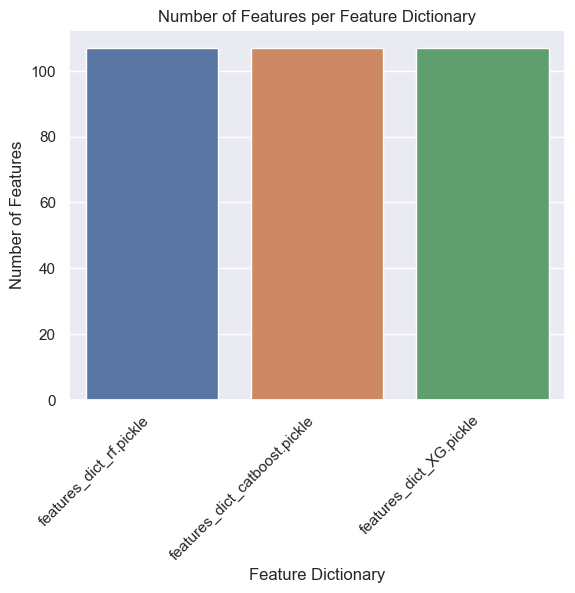

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the names and lengths of the feature dictionaries
feature_dicts = ['features_dict_rf.pickle', 'features_dict_catboost.pickle', 'features_dict_XG.pickle']
feature_dict_lengths = [99, 99, 41]

# Loop through the feature dictionaries and get their lengths
for i, feature_dict in enumerate(feature_dicts):
    with open(feature_dict, 'rb') as handle:
        x = pickle.load(handle)
        feature_dict_lengths[i] = len(x['features'])

# Create a Seaborn bar chart
sns.set_style('darkgrid')
sns.barplot(x=feature_dicts, y=feature_dict_lengths)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature Dictionary')
plt.ylabel('Number of Features')
plt.title('Number of Features per Feature Dictionary')

# Display the chart
plt.show()


# Ensemble Learning 

## MODEL 19 ENSEMBLE LEARNER WITH VOTING CLASSIFER 

In [95]:
import pickle
import numpy as np
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
import time

# Function to load features_dict and get new_features and num_attribs
# Function to load features_dict and get new_features and num_attribs
def load_features_dict_and_prepare(file_path, threshold):
    with open(file_path, 'rb') as handle:
        features_dict = pickle.load(handle)

    features = features_dict['features']
    importances = features_dict['importances']

    new_indices = [idx for idx, x in enumerate(importances) if x > threshold]
    new_importances = [x for idx, x in enumerate(importances) if x > threshold]

    new_features = [features[i] for i in new_indices]
    print(len(new_features))

    num_attribs = new_features

    return num_attribs

np.random.seed(42)

# Load features_dict and get num_attribs for each model with different thresholds
num_attribs_XG = load_features_dict_and_prepare('features_dict_XG.pickle', 0)
num_attribs_cb = load_features_dict_and_prepare('features_dict_catboost.pickle', 0)
num_attribs_rf = load_features_dict_and_prepare('features_dict_rf.pickle', 0.005)


# np.random.seed(42)

# # Load features_dict and get num_attribs for each model
# num_attribs_XG = load_features_dict_and_prepare('features_dict_XG.pickle')
# num_attribs_cb = load_features_dict_and_prepare('features_dict_catboost.pickle')
# num_attribs_rf = load_features_dict_and_prepare('features_dict_rf.pickle')

# Assuming get_pipeline() function is already defined
data_prep_pipeline_XG, selected_features_XG = get_pipeline(num_attribs_XG)
data_prep_pipeline_cb, selected_features_cb = get_pipeline(num_attribs_cb)
data_prep_pipeline_rf, selected_features_rf = get_pipeline(num_attribs_rf)

# Attaching classifiers to the above pipeline with the best parameters
catboost = CatBoostClassifier(random_state=42, iterations=1000, learning_rate=0.01,
                              depth=9, colsample_bylevel=0.5, thread_count=-1, verbose=False)
xgboost = XGBClassifier(random_state=42, n_estimators=1000, max_depth=5, learning_rate=0.01, eta=0.001,
                        colsample_bytree=0.5, n_jobs=-1)
rf = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10, max_features='sqrt',
                            min_samples_leaf=2, min_samples_split=5, n_jobs=-1)

catboost_pipeline = Pipeline([
    ("preparation", data_prep_pipeline_cb),
    ("catboost", catboost)
])

xgboost_pipeline = Pipeline([
    ("preparation", data_prep_pipeline_XG),
    ("xgboost", xgboost)
])

rf_pipeline = Pipeline([
    ("preparation", data_prep_pipeline_rf),
    ("rf", rf)
])

# Ensemble model with voting classifier
ensemble_model = VotingClassifier(estimators=[('catboost', catboost_pipeline),
                                              ('xgboost', xgboost_pipeline),
                                              ('rf', rf_pipeline)],
                                  voting='soft', n_jobs=-1)

# Training the model
start = time.time()
model = ensemble_model.fit(X_train, y_train)
train_time = np.round(time.time() - start, 4)

start = time.time()
score_test = ensemble_model.score(X_test, y_test)
test_time = np.round(time.time() - start, 4)

# Results
exp_name = f"Model 19 - Ensemble Learner - Voting Classsifier "
experiment_description =f" Tuned and selected XgBoost, catboost, random forest  {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog

95
103
41
Total Features: 112 - Numerical: 95, Categorical: 16
Total Features: 120 - Numerical: 103, Categorical: 16
Total Features: 58 - Numerical: 41, Categorical: 16


/Users/saisathwikreddyvarikoti/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/saisathwikreddyvarikoti/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/saisathwikreddyvarikoti/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,exp_name,description,Train Time (sec),Test Time (sec),Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score
0,Model-1 Baseline LR,Logistic regression with undersampled data 124...,2.4318,0.0880,0.7738,0.7638,0.7748,0.7539,0.7407,0.7462,0.3612,0.3272,0.3588
1,Model-2 KNN,KNN with undersampled data-2 124 features,0.2857,2.8018,0.6950,0.6155,0.6184,0.7625,0.6571,0.6550,0.6992,0.6205,0.6226
2,Model-3 Decision Tree,Decision tree with undersampled data-2 124 fea...,1.3998,0.0388,0.6749,0.6535,0.6591,0.7380,0.7105,0.7129,0.6881,0.6678,0.6730
3,Model-4 Random Forest,Random Forest with undersampled data-2 124 fea...,17.3296,0.4940,0.7664,0.6654,0.6661,0.8504,0.7243,0.7273,0.7673,0.6631,0.6640
4,Model-5 Bagging Meta Estimator,Bagging Meta Estimator with undersampled data-...,8.2380,0.2080,0.9844,0.6477,0.6446,0.9990,0.6978,0.6983,0.9842,0.6210,0.6164
5,Model-7 XGBoost,XGBoost SAMME with undersampled data-2 124 fea...,5.6233,0.0837,0.7298,0.6929,0.6945,0.8102,0.7616,0.7610,0.7290,0.6922,0.6931
6,Model-12 CATBoost,CATBoost with undersampled data-2 124 features,10.1684,0.4436,0.6964,0.6904,0.6926,0.7671,0.7580,0.7591,0.6954,0.6901,0.6906
7,Model-12 CATBoost,CATBoost with undersampled data-2 124 features,13.1720,0.4564,0.6964,0.6904,0.6926,0.7671,0.7580,0.7591,0.6954,0.6901,0.6906
8,Model-2 Baseline LR,Logistic regression with undersampled data-2 1...,2.0058,0.0532,0.6876,0.6843,0.6904,0.7525,0.7489,0.7535,0.6865,0.6854,0.6900
9,Model 10 - XGBOOST -Feature &hyperParameter Tu...,XGBOOST Tuned with x>0 112 features,11.4474,0.0992,0.7298,0.6951,0.6966,0.8091,0.7619,0.7624,0.7289,0.6947,0.6952


## MODEL 20 ENSEMBLE LEARNER WITH STACKING CLASSIFER 

In [96]:
import pickle
import numpy as np
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
import time
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
import numpy as np
import time

# Function to load features_dict and get new_features and num_attribs
# Function to load features_dict and get new_features and num_attribs
def load_features_dict_and_prepare(file_path, threshold):
    with open(file_path, 'rb') as handle:
        features_dict = pickle.load(handle)

    features = features_dict['features']
    importances = features_dict['importances']

    new_indices = [idx for idx, x in enumerate(importances) if x > threshold]
    new_importances = [x for idx, x in enumerate(importances) if x > threshold]

    new_features = [features[i] for i in new_indices]
    print(len(new_features))

    num_attribs = new_features

    return num_attribs

np.random.seed(42)

# Load features_dict and get num_attribs for each model with different thresholds
num_attribs_XG = load_features_dict_and_prepare('features_dict_XG.pickle', 0)
num_attribs_cb = load_features_dict_and_prepare('features_dict_catboost.pickle', 0)
num_attribs_rf = load_features_dict_and_prepare('features_dict_rf.pickle', 0.005)


# Assuming get_pipeline() function is already defined
data_prep_pipeline_XG, selected_features_XG = get_pipeline(num_attribs_XG)
data_prep_pipeline_cb, selected_features_cb = get_pipeline(num_attribs_cb)
data_prep_pipeline_rf, selected_features_rf = get_pipeline(num_attribs_rf)

# Attaching classifiers to the above pipeline with the best parameters
catboost = CatBoostClassifier(random_state=42, iterations=1000, learning_rate=0.01,
                              depth=9, colsample_bylevel=0.5, thread_count=-1, verbose=False)
xgboost = XGBClassifier(random_state=42, n_estimators=1000, max_depth=5, learning_rate=0.01, eta=0.001,
                        colsample_bytree=0.5, n_jobs=-1)
rf = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10, max_features='sqrt',
                            min_samples_leaf=2, min_samples_split=5, n_jobs=-1)

catboost_pipeline = Pipeline([
    ("preparation", data_prep_pipeline_cb),
    ("catboost", catboost)
])

xgboost_pipeline = Pipeline([
    ("preparation", data_prep_pipeline_XG),
    ("xgboost", xgboost)
])

rf_pipeline = Pipeline([
    ("preparation", data_prep_pipeline_rf),
    ("rf", rf)
])

# Ensemble model with stacking classifier
final_estimator = LogisticRegression(random_state=42)
ensemble_model = StackingClassifier(estimators=[('catboost', catboost_pipeline),
                                                ('xgboost', xgboost_pipeline),
                                                ('rf', rf_pipeline)],
                                    final_estimator=final_estimator, n_jobs=-1)

# Training the model
start = time.time()
model = ensemble_model.fit(X_train, y_train)
train_time = np.round(time.time() - start, 4)

start = time.time()
score_test = ensemble_model.score(X_test, y_test)
test_time = np.round(time.time() - start, 4)

# Results
exp_name = f"Model 20 - Ensemble Learner - Stacking Classsifier "
experiment_description =f" Tuned and selected XgBoost, catboost, random forest  {len(selected_features)} features"
expLog = get_results(expLog, exp_name,experiment_description,model, train_time, test_time, X_train, y_train, X_valid, y_valid, X_test, y_test)
expLog

95
103
41
Total Features: 112 - Numerical: 95, Categorical: 16
Total Features: 120 - Numerical: 103, Categorical: 16
Total Features: 58 - Numerical: 41, Categorical: 16


/Users/saisathwikreddyvarikoti/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/saisathwikreddyvarikoti/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/saisathwikreddyvarikoti/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/saisathwikreddyvarikoti/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoder

,exp_name,description,Train Time (sec),Test Time (sec),Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score
0,Model-1 Baseline LR,Logistic regression with undersampled data 124...,2.4318,0.0880,0.7738,0.7638,0.7748,0.7539,0.7407,0.7462,0.3612,0.3272,0.3588
1,Model-2 KNN,KNN with undersampled data-2 124 features,0.2857,2.8018,0.6950,0.6155,0.6184,0.7625,0.6571,0.6550,0.6992,0.6205,0.6226
2,Model-3 Decision Tree,Decision tree with undersampled data-2 124 fea...,1.3998,0.0388,0.6749,0.6535,0.6591,0.7380,0.7105,0.7129,0.6881,0.6678,0.6730
3,Model-4 Random Forest,Random Forest with undersampled data-2 124 fea...,17.3296,0.4940,0.7664,0.6654,0.6661,0.8504,0.7243,0.7273,0.7673,0.6631,0.6640
4,Model-5 Bagging Meta Estimator,Bagging Meta Estimator with undersampled data-...,8.2380,0.2080,0.9844,0.6477,0.6446,0.9990,0.6978,0.6983,0.9842,0.6210,0.6164
5,Model-7 XGBoost,XGBoost SAMME with undersampled data-2 124 fea...,5.6233,0.0837,0.7298,0.6929,0.6945,0.8102,0.7616,0.7610,0.7290,0.6922,0.6931
6,Model-12 CATBoost,CATBoost with undersampled data-2 124 features,10.1684,0.4436,0.6964,0.6904,0.6926,0.7671,0.7580,0.7591,0.6954,0.6901,0.6906
7,Model-12 CATBoost,CATBoost with undersampled data-2 124 features,13.1720,0.4564,0.6964,0.6904,0.6926,0.7671,0.7580,0.7591,0.6954,0.6901,0.6906
8,Model-2 Baseline LR,Logistic regression with undersampled data-2 1...,2.0058,0.0532,0.6876,0.6843,0.6904,0.7525,0.7489,0.7535,0.6865,0.6854,0.6900
9,Model 10 - XGBOOST -Feature &hyperParameter Tu...,XGBOOST Tuned with x>0 112 features,11.4474,0.0992,0.7298,0.6951,0.6966,0.8091,0.7619,0.7624,0.7289,0.6947,0.6952


In [97]:
# Write the data to a CSV file
expLog.to_csv('expLog2.csv', index=False)

In [98]:
df = pd.read_csv('expLog2.csv')
df

,exp_name,description,Train Time (sec),Test Time (sec),Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score
0,Model-1 Baseline LR,Logistic regression with undersampled data 124...,2.4318,0.0880,0.7738,0.7638,0.7748,0.7539,0.7407,0.7462,0.3612,0.3272,0.3588
1,Model-2 KNN,KNN with undersampled data-2 124 features,0.2857,2.8018,0.6950,0.6155,0.6184,0.7625,0.6571,0.6550,0.6992,0.6205,0.6226
2,Model-3 Decision Tree,Decision tree with undersampled data-2 124 fea...,1.3998,0.0388,0.6749,0.6535,0.6591,0.7380,0.7105,0.7129,0.6881,0.6678,0.6730
3,Model-4 Random Forest,Random Forest with undersampled data-2 124 fea...,17.3296,0.4940,0.7664,0.6654,0.6661,0.8504,0.7243,0.7273,0.7673,0.6631,0.6640
4,Model-5 Bagging Meta Estimator,Bagging Meta Estimator with undersampled data-...,8.2380,0.2080,0.9844,0.6477,0.6446,0.9990,0.6978,0.6983,0.9842,0.6210,0.6164
5,Model-7 XGBoost,XGBoost SAMME with undersampled data-2 124 fea...,5.6233,0.0837,0.7298,0.6929,0.6945,0.8102,0.7616,0.7610,0.7290,0.6922,0.6931
6,Model-12 CATBoost,CATBoost with undersampled data-2 124 features,10.1684,0.4436,0.6964,0.6904,0.6926,0.7671,0.7580,0.7591,0.6954,0.6901,0.6906
7,Model-12 CATBoost,CATBoost with undersampled data-2 124 features,13.1720,0.4564,0.6964,0.6904,0.6926,0.7671,0.7580,0.7591,0.6954,0.6901,0.6906
8,Model-2 Baseline LR,Logistic regression with undersampled data-2 1...,2.0058,0.0532,0.6876,0.6843,0.6904,0.7525,0.7489,0.7535,0.6865,0.6854,0.6900
9,Model 10 - XGBOOST -Feature &hyperParameter Tu...,XGBOOST Tuned with x>0 112 features,11.4474,0.0992,0.7298,0.6951,0.6966,0.8091,0.7619,0.7624,0.7289,0.6947,0.6952


## Submission File Prep

For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

```python 
SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2
etc.
```

In [99]:
X_kaggle_test

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,SK_ID_CURR
0,0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241,-2329,-5170.0,-812,...,Married,House / apartment,NaN,TUESDAY,Kindergarten,NaN,block of flats,"Stone, brick",No,100001
1,0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064,-4469,-9118.0,-1623,...,Married,House / apartment,Low-skill Laborers,FRIDAY,Self-employed,NaN,NaN,NaN,NaN,100005
2,0,202500.0,663264.0,69777.0,630000.0,0.019101,-20038,-4458,-2175.0,-3503,...,Married,House / apartment,Drivers,MONDAY,Transport: type 3,NaN,NaN,NaN,NaN,100013
3,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976,-1866,-2000.0,-4208,...,Married,House / apartment,Sales staff,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No,100028
4,1,180000.0,625500.0,32067.0,625500.0,0.010032,-13040,-2191,-4000.0,-4262,...,Married,House / apartment,NaN,FRIDAY,Business Entity Type 3,NaN,NaN,NaN,NaN,100038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,0,121500.0,412560.0,17473.5,270000.0,0.002042,-19970,-5169,-9094.0,-3399,...,Widow,House / apartment,NaN,WEDNESDAY,Other,NaN,NaN,NaN,NaN,456221
48740,2,157500.0,622413.0,31909.5,495000.0,0.035792,-11186,-1149,-3015.0,-3003,...,Married,House / apartment,Sales staff,MONDAY,Trade: type 7,NaN,NaN,NaN,NaN,456222
48741,1,202500.0,315000.0,33205.5,315000.0,0.026392,-15922,-3037,-2681.0,-1504,...,Married,House / apartment,NaN,WEDNESDAY,Business Entity Type 3,NaN,block of flats,"Stone, brick",No,456223
48742,0,225000.0,450000.0,25128.0,450000.0,0.018850,-13968,-2731,-1461.0,-1364,...,Married,House / apartment,Managers,MONDAY,Self-employed,NaN,block of flats,Panel,No,456224


In [100]:
test_class_scores = model.predict_proba(X_kaggle_test)[:, 1]

In [101]:
# Submission dataframe
submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores

submit_df.head()

,SK_ID_CURR,TARGET
0,100001,0.398209
1,100005,0.571568
2,100013,0.211412
3,100028,0.290387
4,100038,0.705963


In [102]:
submit_df.to_csv("submission.csv",index=False)

# Kaggle submission via the command line API

In [103]:
! kaggle competitions submit -c home-credit-default-risk -f submission.csv -m "baseline submission"

100%|██████████████████████████████████████| 1.22M/1.22M [00:01<00:00, 1.22MB/s]
Successfully submitted to Home Credit Default Risk

## report submission

Click on this [link](https://www.kaggle.com/c/home-credit-default-risk/submissions?sortBy=date&group=all&page=1)

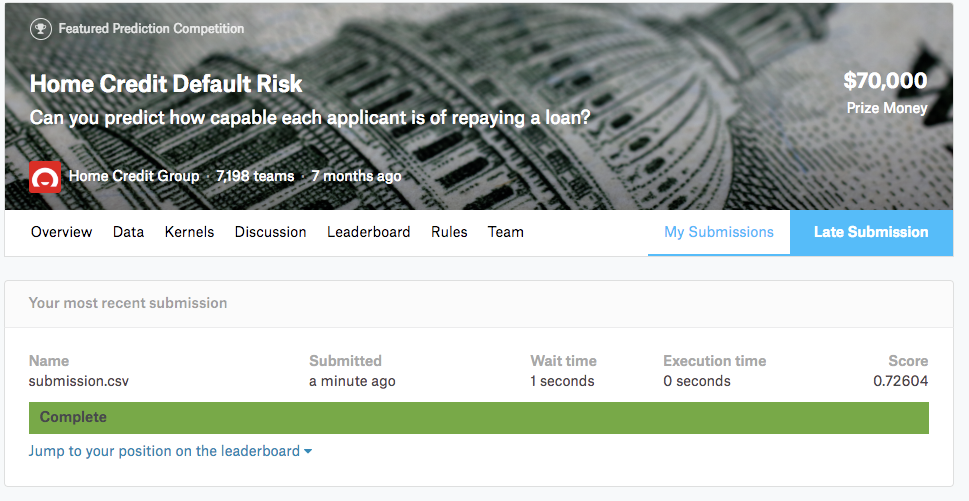

# Write-up 
For this phase of the project, you will need to submit a write-up summarizing the work you did. 
The write-up form is available on Canvas (Modules-> Module 12.1 - Course Project - Home Credit Default Risk (HCDR)-> FP Phase 2 (HCDR) : write-up form ). It has the following sections: 
## Abstract
Please provide an abstract summarizing the work you did (150 words)
## Introduction
## Feature Engineering and transformers
Please explain the work you conducted on feature engineering and transformers. 
Please include code sections when necessary as well as images or any relevant material
## Pipelines
Please explain the pipelines you created for this project and how you used them
Please include code sections when necessary as well as images or any relevant material
## Experimental results
Please present the results of the various experiments that you conducted. The results should be shown in a table or image. Try to include the different details for each experiment.  

Please include code sections when necessary as well as images or any relevant material
## Discussion
Discuss  & analyze your different experimental results  

Please include code sections when necessary as well as images or any relevant material
## Conclusion
## Kaggle Submission
Please provide a screenshot of your best kaggle submission.   
The screenshot should show the different details of the submission and not just the score.

# References

Some of the material in this notebook has been adopted from [here](https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction/notebook)


#  TODO: Predicting Loan Repayment with Automated Feature Engineering in Featuretools

Read the following:
* feature engineering via Featuretools library: 
  * https://github.com/Featuretools/predict-loan-repayment/blob/master/Automated%20Loan%20Repayment.ipynb
* https://www.analyticsvidhya.com/blog/2018/08/guide-automated-feature-engineering-featuretools-python/
* feature engineering paper: https://dai.lids.mit.edu/wp-content/uploads/2017/10/DSAA_DSM_2015.pdf
* https://www.analyticsvidhya.com/blog/2017/08/catboost-automated-categorical-data/